# CDades Sprint 6 Algoritmes d'aprenentatge supervisat, Regressió.

### Empezamos el ejercicio de este sprint importando el dataset y preparándolo para construir nuestros modelos de regresión.
#### Este dataset lo analizamos y trabajamos en el ejercicio anterior, así empezamos el ejercicio sabiendo que no tiene valores nulos, conociendo cada variable, sus distribuciones y las transformaciones que necesitan.

In [1]:
# importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# importamos los datos
df_housing = pd.read_csv("C:\IT Academy\Sprint 5 Introducción al Test de Hipótesis y al Machine Learning\housing data.csv", header=None)

In [3]:
# nombramos las columnas
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#### Descripción de los atributos

In [4]:
df_housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [5]:
df_housing.shape

(506, 14)

In [6]:
df_housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df_housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

#### Definimos nuestra variable objetivo/target.

In [8]:
y = df_housing['MEDV'].copy()
y.shape

(506,)

#### Definimos el dataset que contiene los atributos de nuestro estudio.

In [9]:
X = df_housing.drop('MEDV', axis=1).copy()
X.shape

(506, 13)

### Preprocesado.
Ampliamos el preprocesado en algunas variables.

#### Estudio de la simetría.

In [10]:
X.agg(['skew','kurtosis']).T

skew   kurtosis
CRIM     5.223149  37.130509
ZN       2.225666   4.031510
INDUS    0.295022  -1.233540
CHAS     3.405904   9.638264
NOX      0.729308  -0.064667
RM       0.403612   1.891500
AGE     -0.598963  -0.967716
DIS      1.011781   0.487941
RAD      1.004815  -0.867232
TAX      0.669956  -1.142408
PTRATIO -0.802325  -0.285091
B       -2.890374   7.226818
LSTAT    0.906460   0.493240

Para las variables con distribución sesgada moderada NOX y TAX y para las variables altamente sesgadas LSTATS, CRIM y DIS aplicaremos una transformación logarítmica. No es posible hacer este preprocesado sobre otras variables con distrución sesgada al tener valores negativos y valores 0.

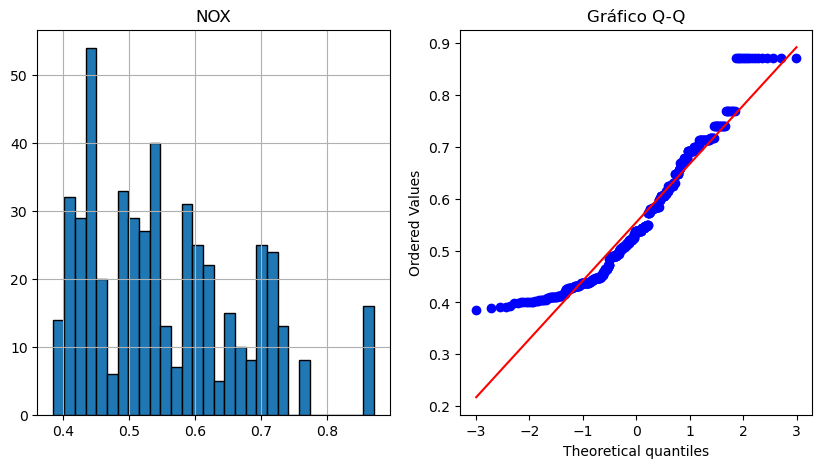

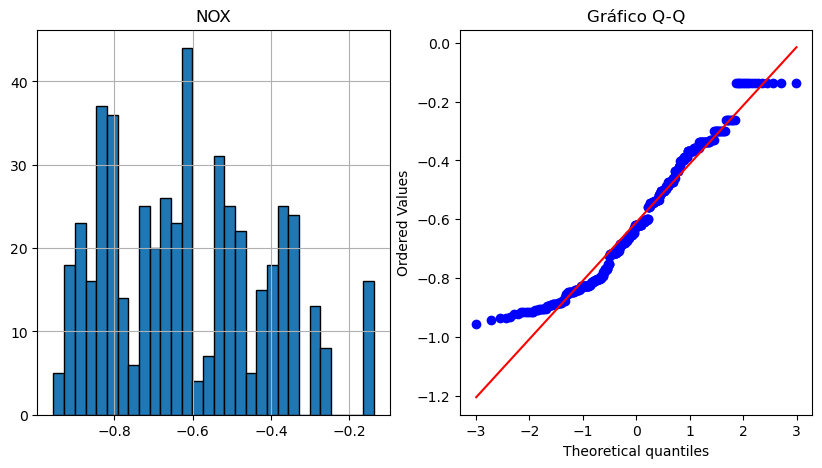

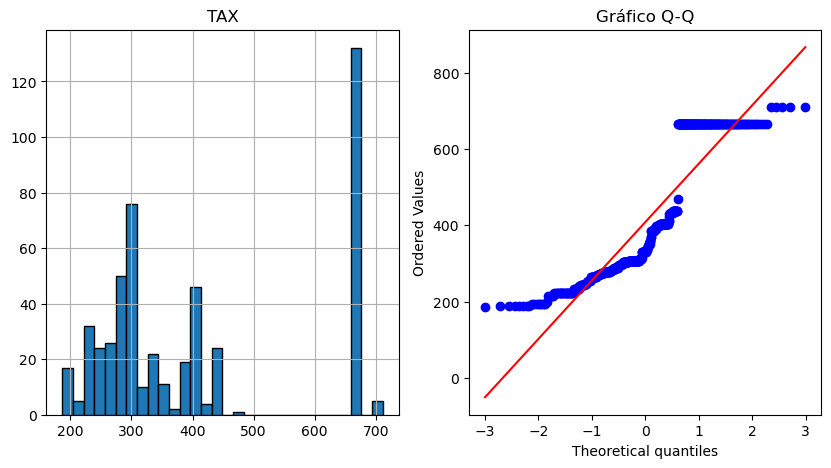

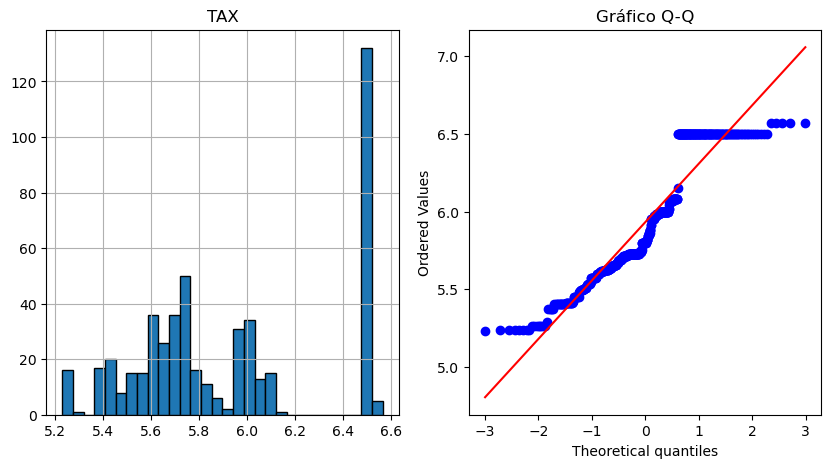

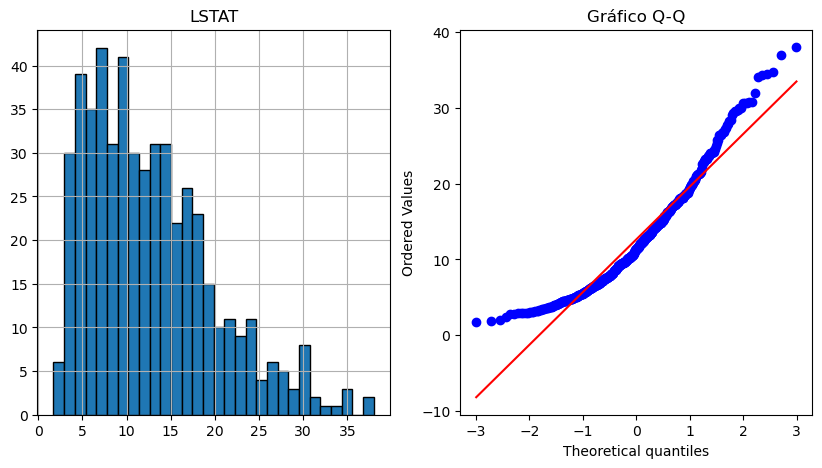

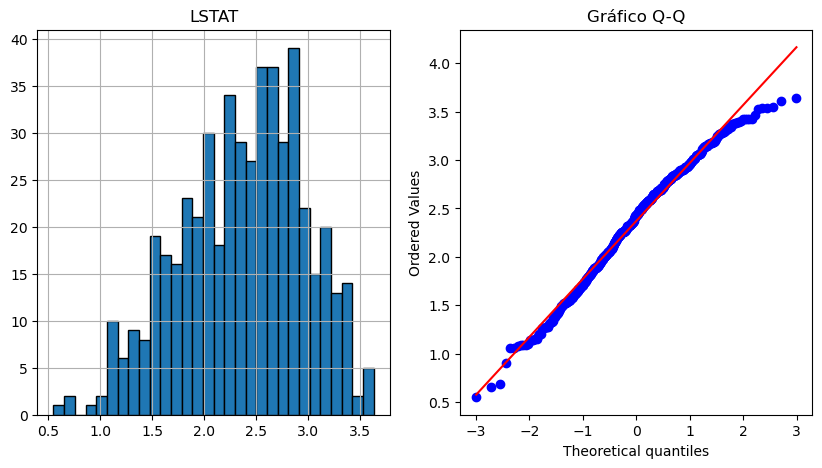

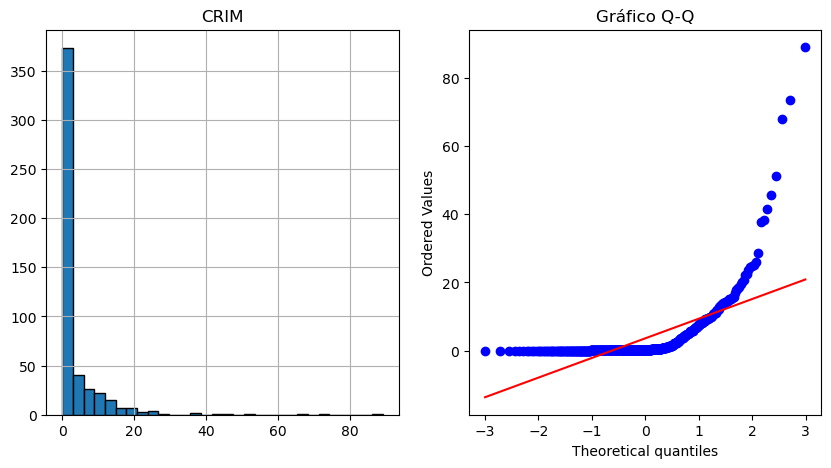

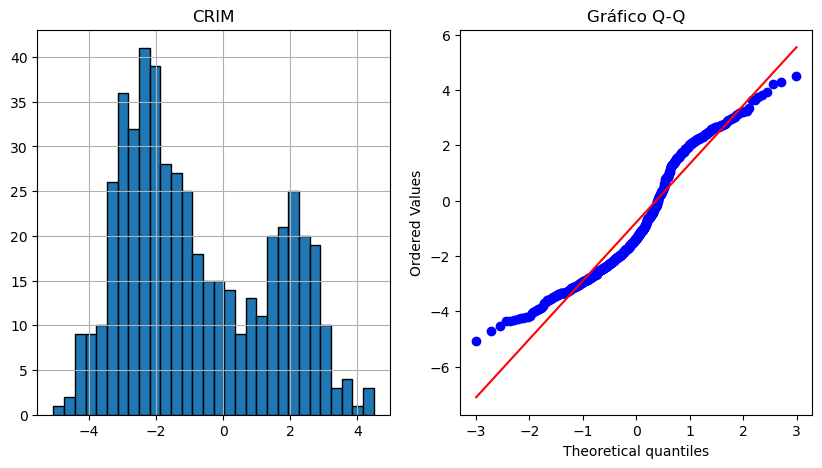

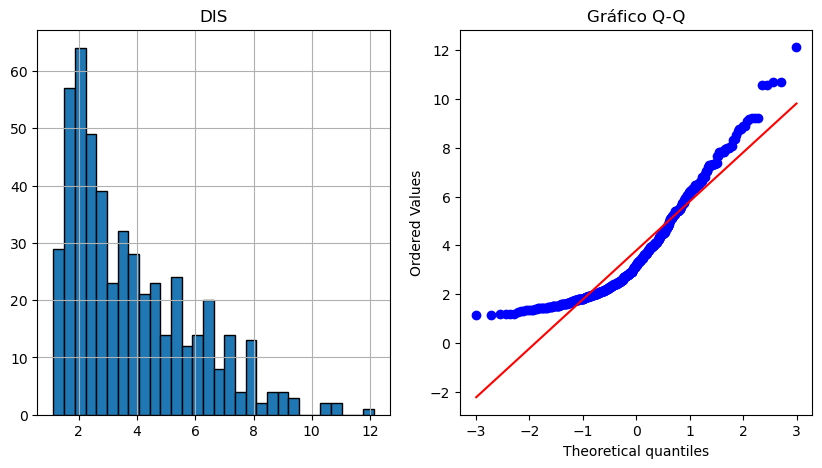

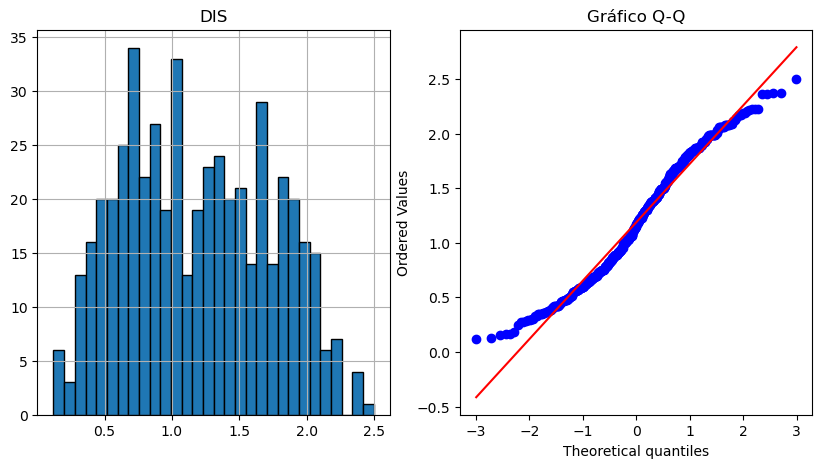

In [11]:
log = ['NOX','TAX','LSTAT','CRIM', 'DIS']
for colum in log: 
    X[colum] = np.log(X[[colum]])   # transformación logarítmica
    # gráficos antes de la transformación
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(colum)
    df_housing[colum].hist(bins=30,edgecolor='black')
    plt.subplot(1,2,2)
    stats.probplot(df_housing[colum], dist='norm', plot=plt)
    plt.title('Gráfico Q-Q')
    # gráficos después de la transformación
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(colum)
    X[colum].hist(bins=30,edgecolor='black')
    plt.subplot(1,2,2)
    stats.probplot(X[colum], dist='norm', plot=plt)
    plt.title('Gráfico Q-Q') 

El gráfico cuantil-cuantil (Normal Q-Q) nos permite comparar la distribución de la variable con la distribución normal teórica.  
Vemos que las distribuciones de nuestras variables se ajustan mejor a una distribución normal después del preprocesado.

#### Preprocesado de RAD.
Varible numérica ordinal, la transformamos en una variable dummie.

In [12]:
# creamos las columnas dummies
dummy_RAD = pd.get_dummies(X["RAD"], prefix="RAD")
# eliminamos la variable RAD
X = X.drop(["RAD"], axis = 1)
# Añadimos las columnas dummies creadas al dataset original.
X = pd.concat([X, dummy_RAD], axis = 1)
X.head()

CRIM    ZN  INDUS  CHAS       NOX     RM   AGE       DIS       TAX  \
0 -5.064036  18.0   2.31     0 -0.619897  6.575  65.2  1.408545  5.690359   
1 -3.600502   0.0   7.07     0 -0.757153  6.421  78.9  1.602836  5.488938   
2 -3.601235   0.0   7.07     0 -0.757153  7.185  61.1  1.602836  5.488938   
3 -3.430523   0.0   2.18     0 -0.780886  6.998  45.8  1.802073  5.402677   
4 -2.672924   0.0   2.18     0 -0.780886  7.147  54.2  1.802073  5.402677   

   PTRATIO  ...     LSTAT  RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  \
0     15.3  ...  1.605430      1      0      0      0      0      0      0   
1     17.8  ...  2.212660      0      1      0      0      0      0      0   
2     17.8  ...  1.393766      0      1      0      0      0      0      0   
3     18.7  ...  1.078410      0      0      1      0      0      0      0   
4     18.7  ...  1.673351      0      0      1      0      0      0      0   

   RAD_8  RAD_24  
0      0       0  
1      0       0  
2      0       0  
3      0       0  
4      0       0  

[5 rows x 21 columns]

#### Preprocesado para variables con outliers.
Normalizamos sus distribuciones con Robust Scaler sin perder los valores atípicos o extremos.

In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
variablesRbSc = ['ZN', 'AGE', 'RM', 'PTRATIO','B']
rs = RobustScaler()
X[variablesRbSc] = rs.fit_transform(X[variablesRbSc])

#### Preprocesado para las variables con distribución no normal.  
Normalizamos sus distribuciones con MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
variablesNorm = ['CRIM','INDUS', 'TAX', 'NOX', 'DIS','LSTAT']
mms = MinMaxScaler(feature_range = (0, 1))
X[variablesNorm] = mms.fit_transform(X[variablesNorm])

#### Gráficas de las variables antes y después del preprocesado.  
Comprobamos que el preprocesado se ha realizado correctamente.

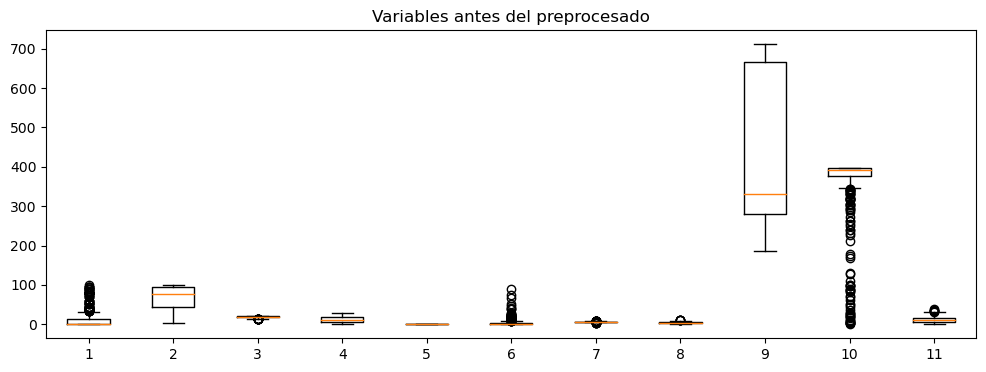

In [17]:
datos_graf = [df_housing['ZN'],df_housing['AGE'],df_housing['PTRATIO'],df_housing['INDUS'],df_housing['NOX'],df_housing['CRIM'],df_housing['RM'],df_housing['DIS'],df_housing['TAX'],df_housing['B'],df_housing['LSTAT']]
fig = plt.figure(1, figsize=(12, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot(datos_graf)
ax.set_title("Variables antes del preprocesado", fontsize = 12);

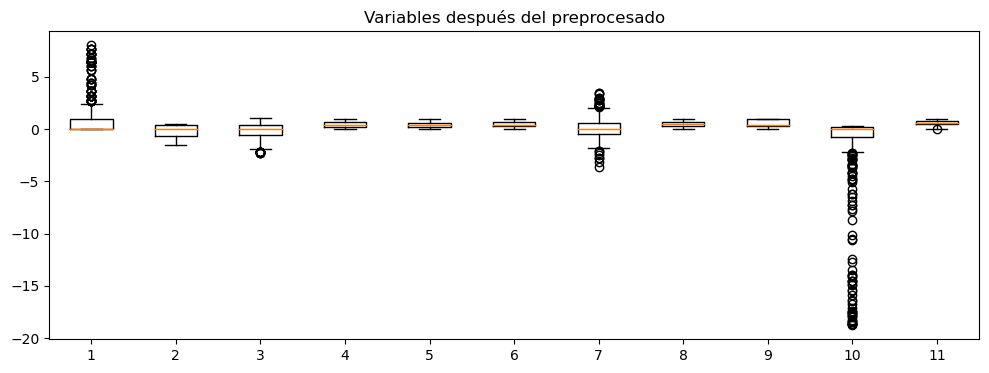

In [18]:
datos_grafFS = [X['ZN'],X['AGE'],X['PTRATIO'],X['INDUS'],X['NOX'],X['CRIM'],X['RM'],X['DIS'],X['TAX'],X['B'],X['LSTAT']]
fig = plt.figure(1, figsize=(12, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot(datos_grafFS)
ax.set_title("Variables después del preprocesado", fontsize = 12);

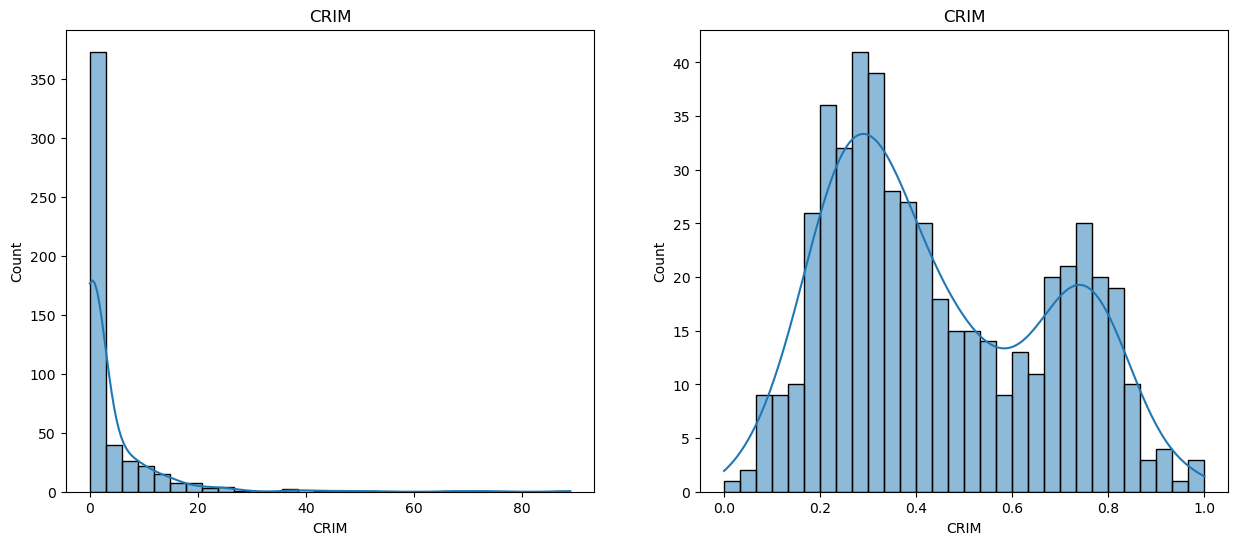

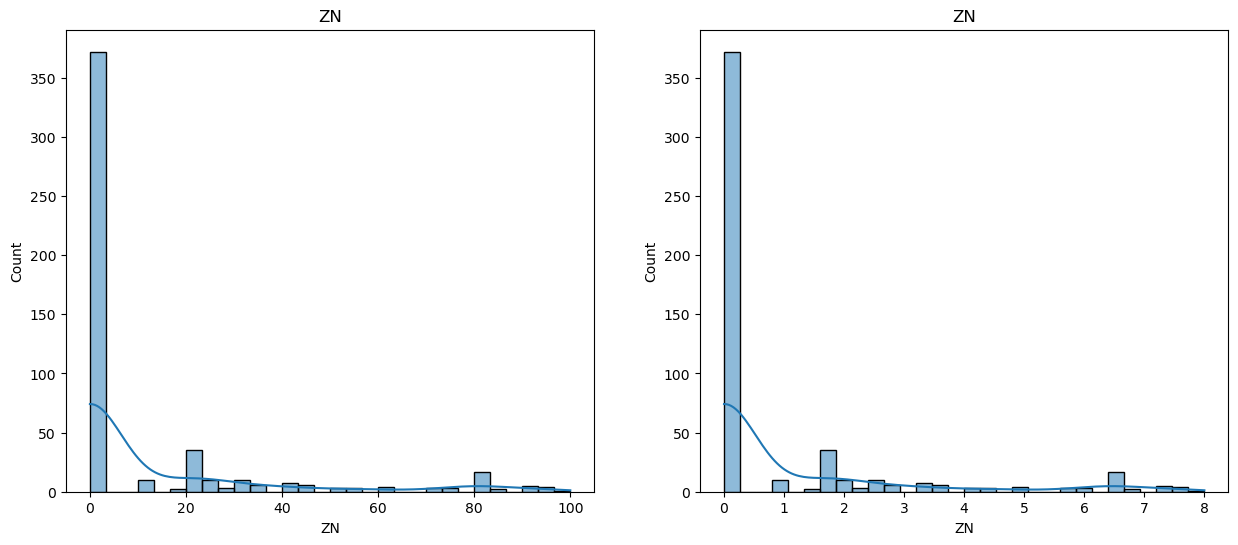

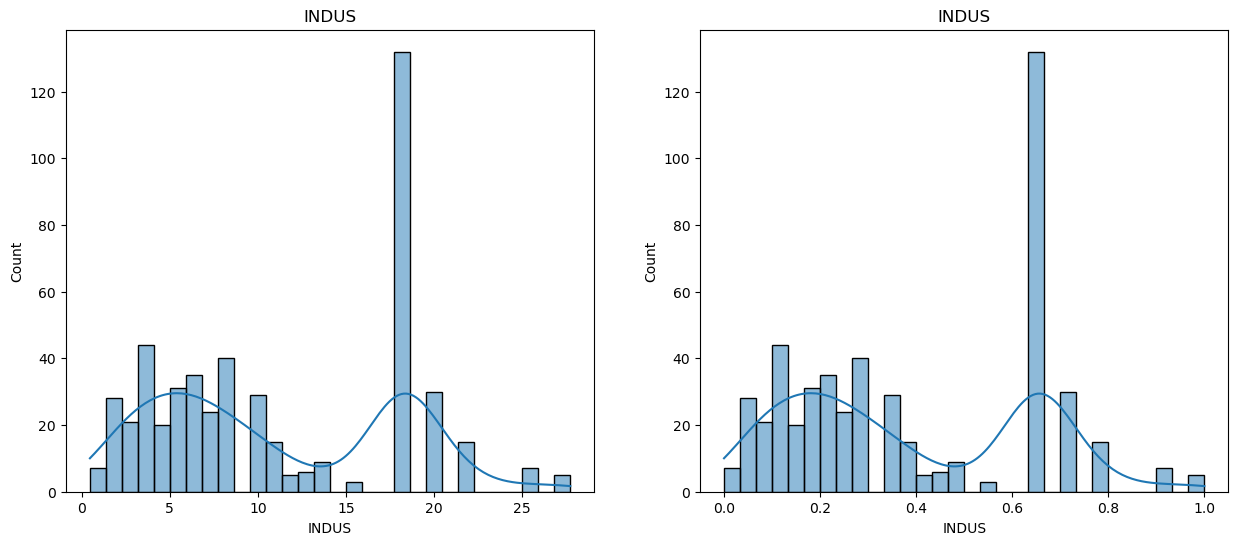

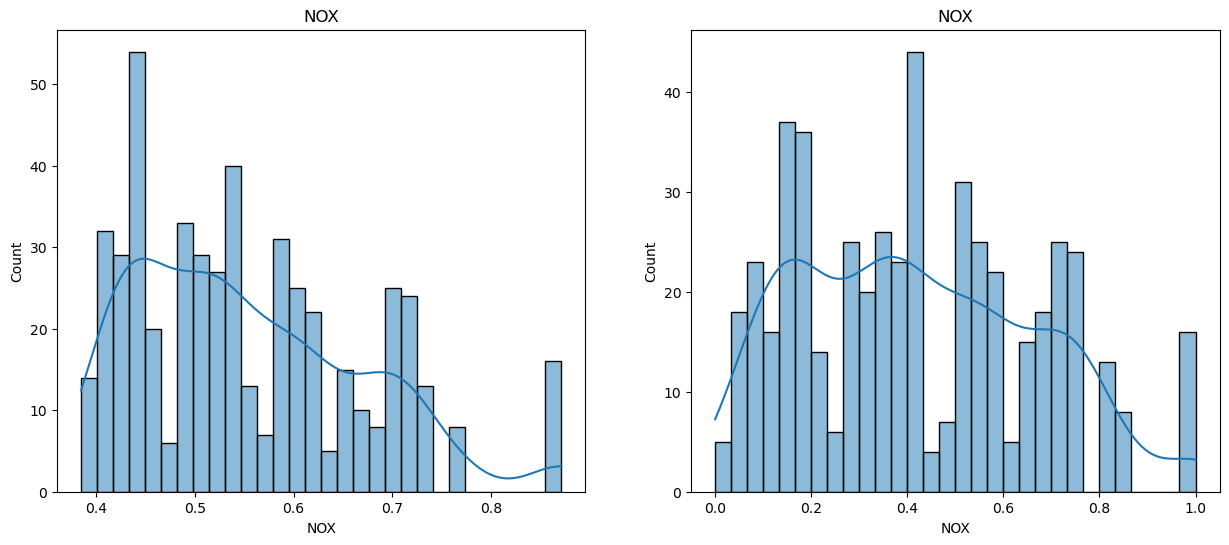

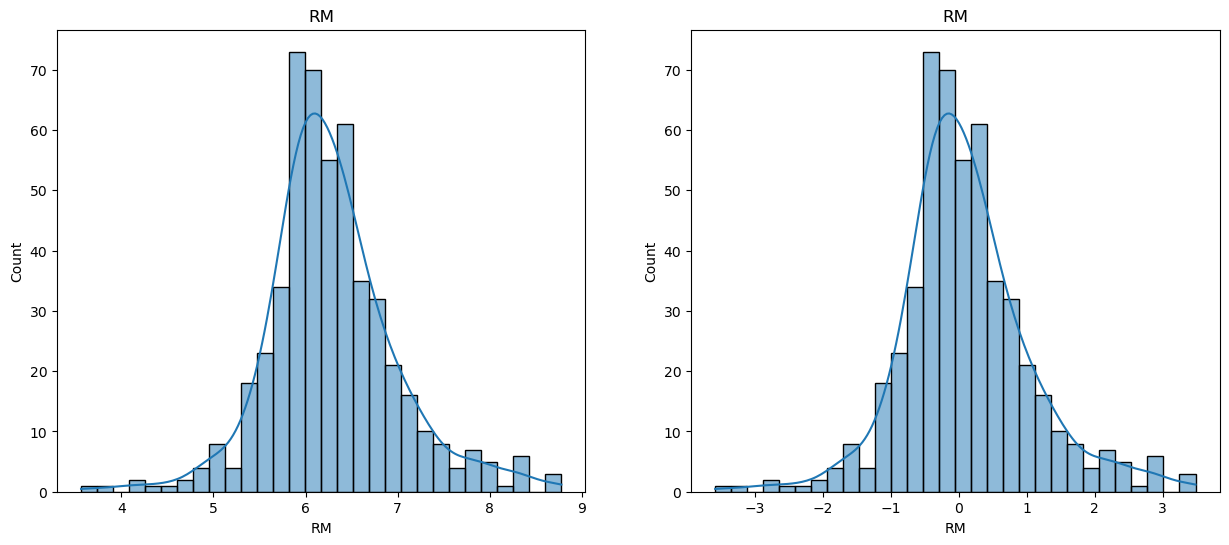

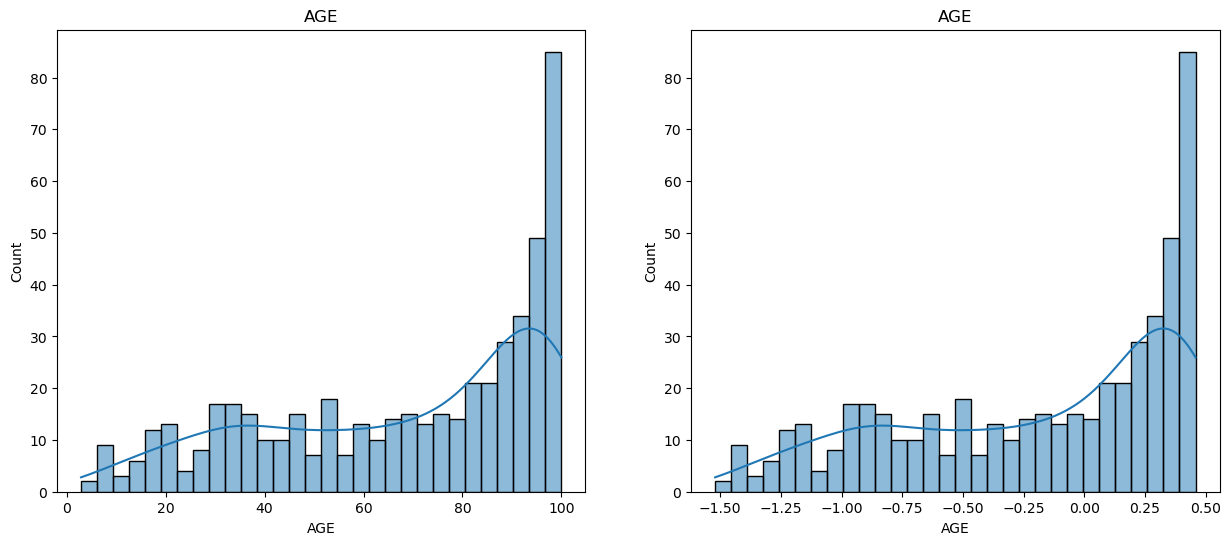

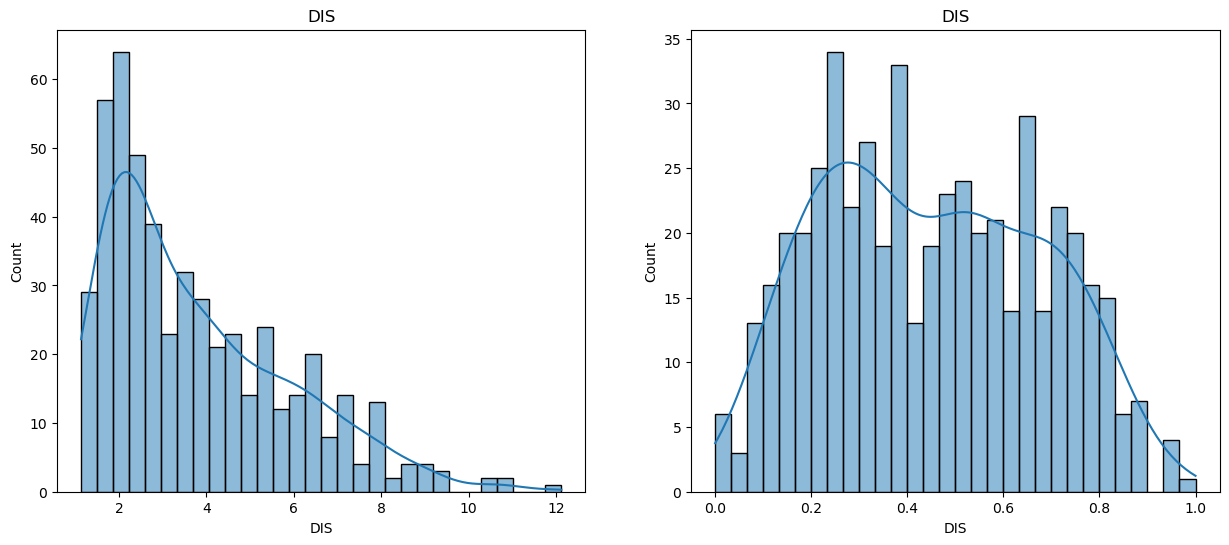

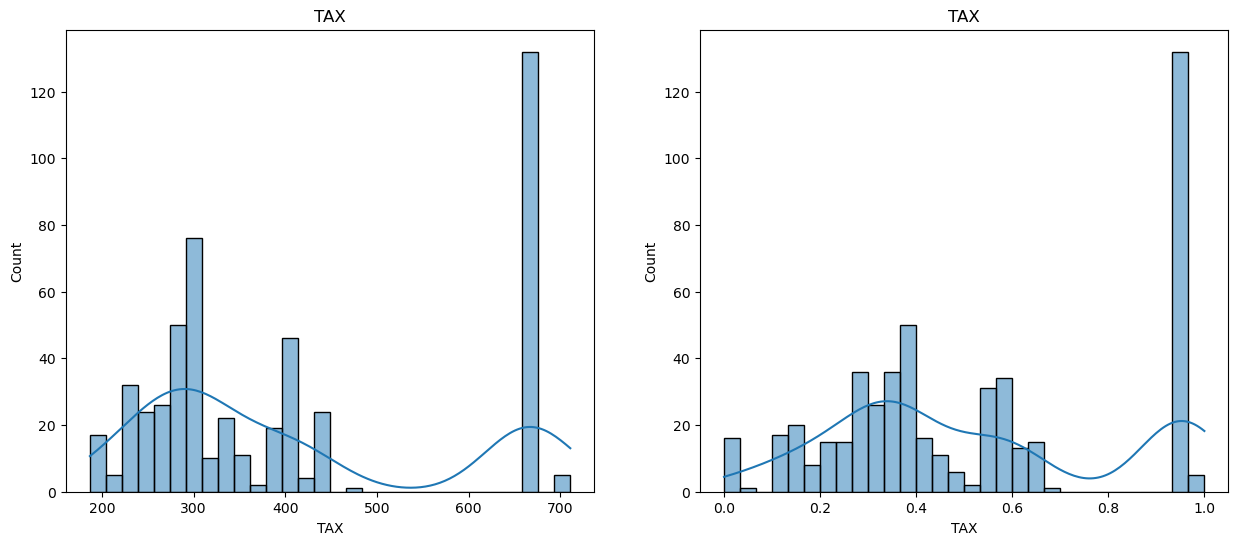

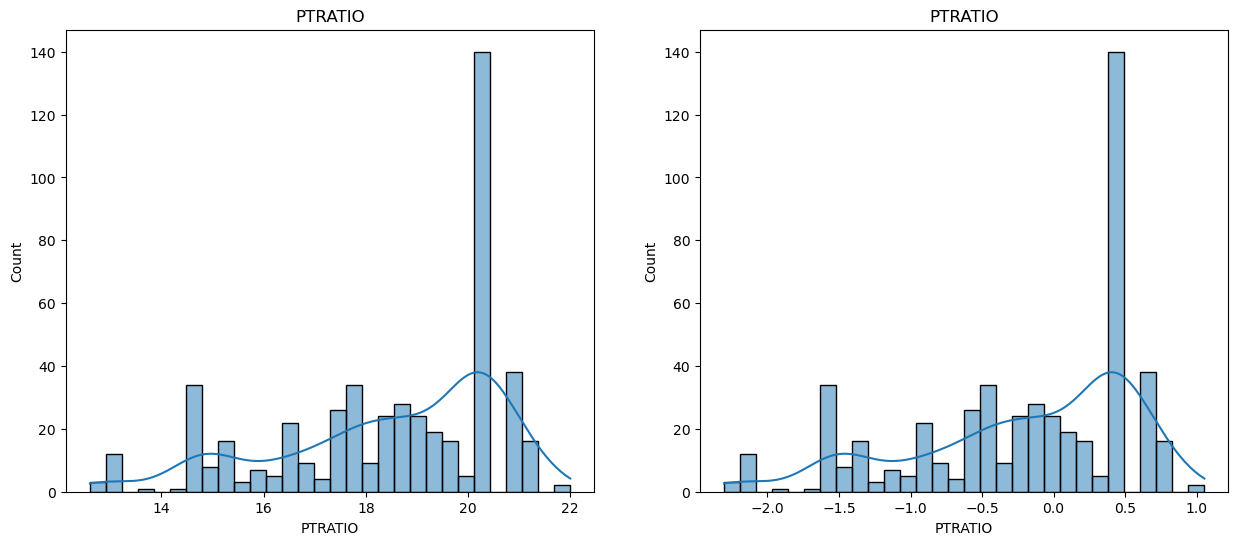

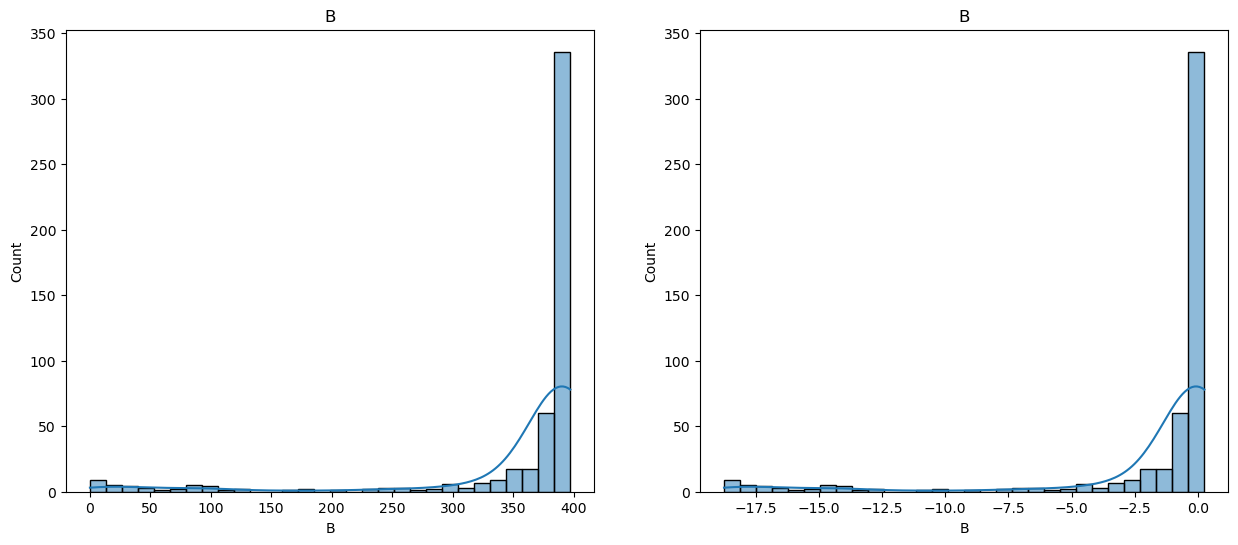

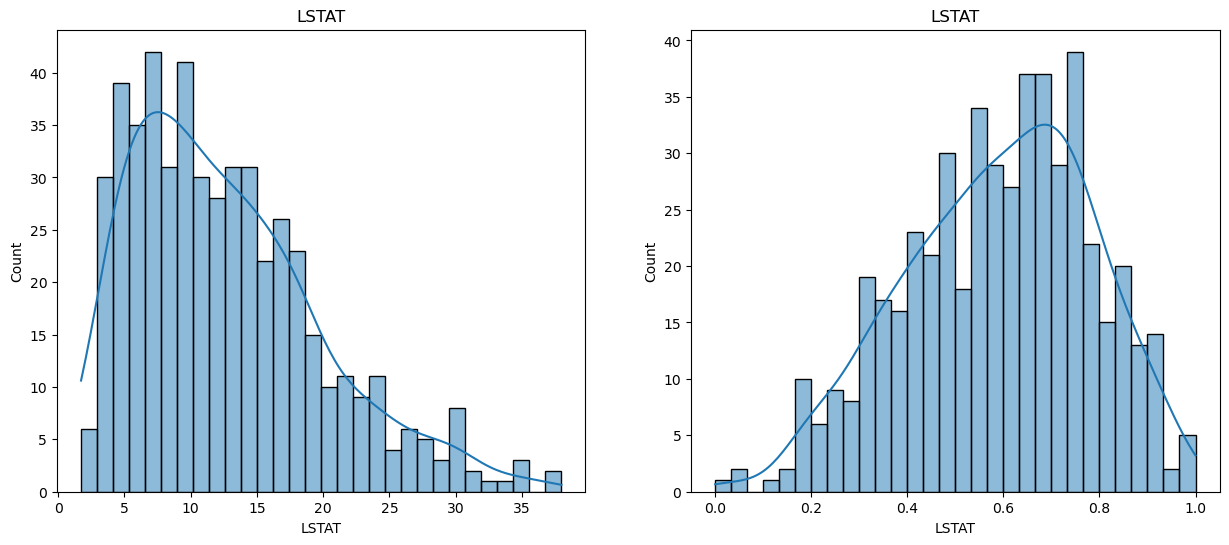

In [19]:
columns = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for colum in columns:
    # distribución de la variable antes del preprocesado
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(colum)
    sns.histplot(df_housing[colum] , bins = 30, kde=True)
    # distribución de la variable después del preprocesado
    plt.subplot(1,2,2)
    plt.title(colum)
    sns.histplot(X[colum] , bins = 30, kde=True)

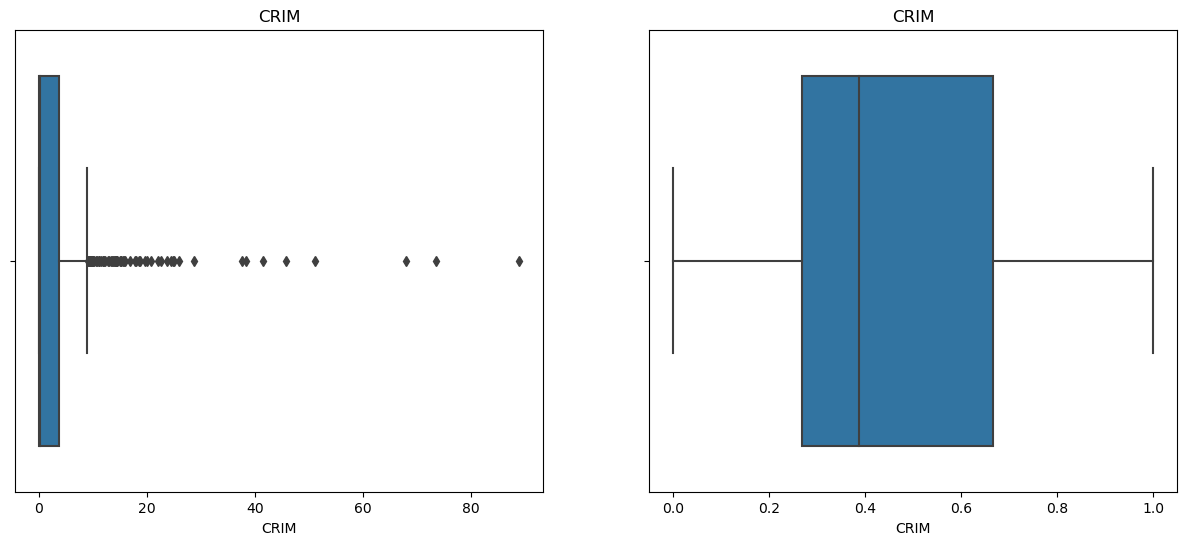

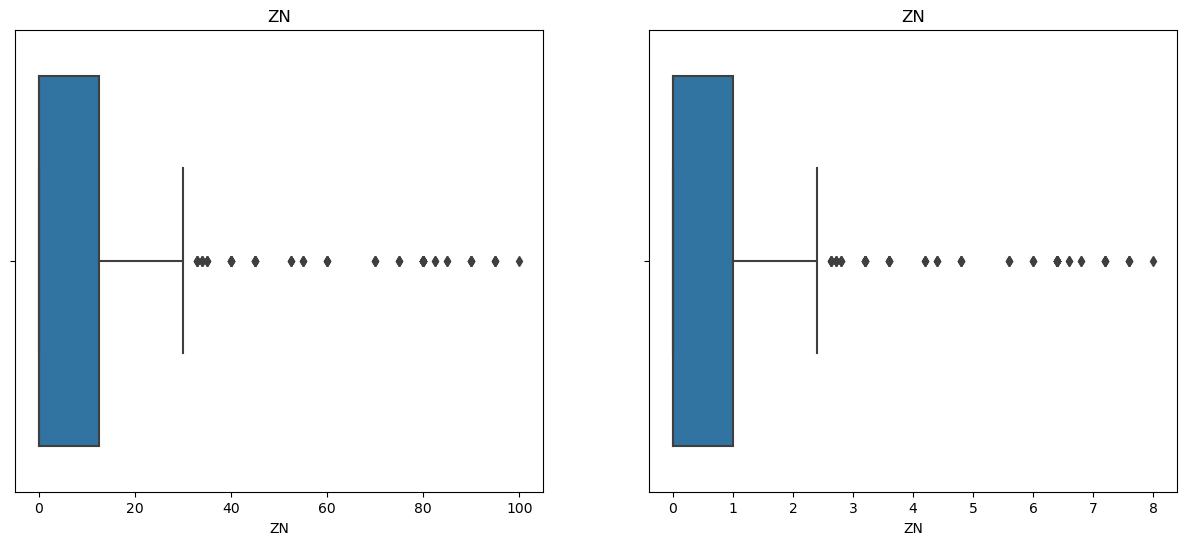

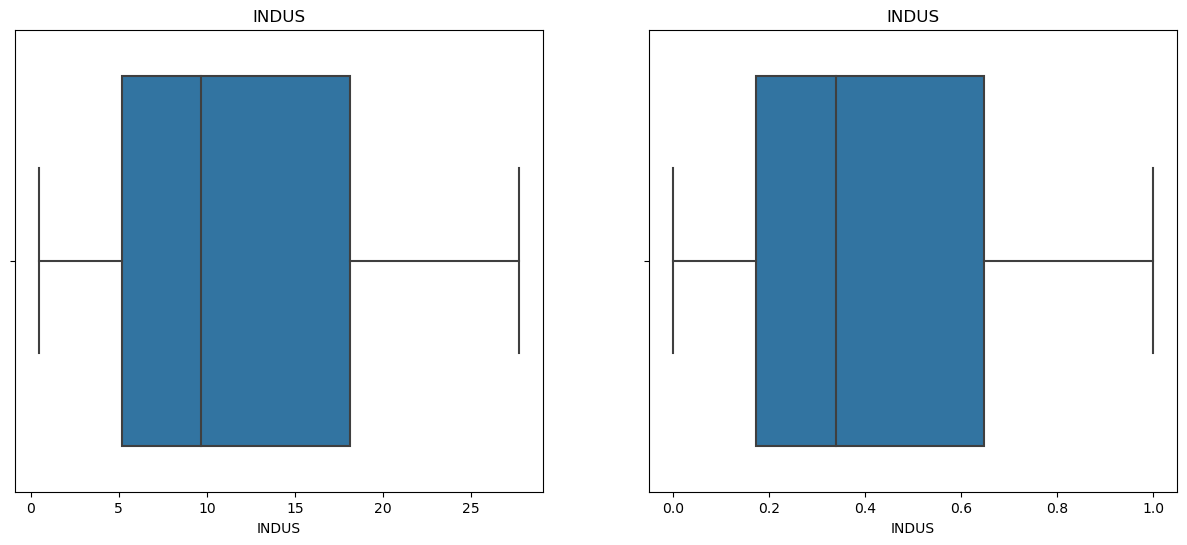

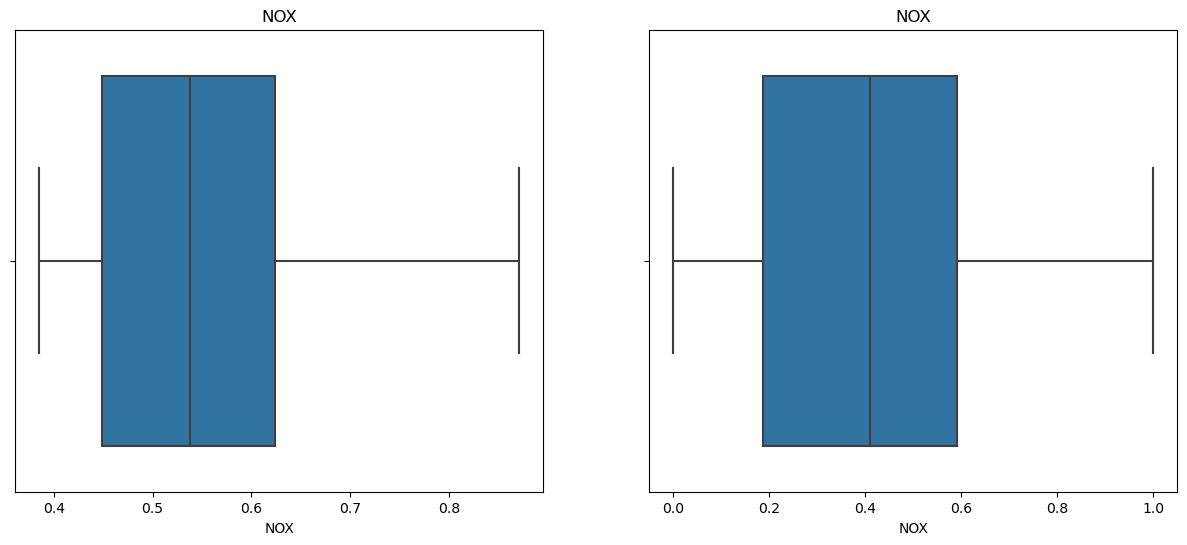

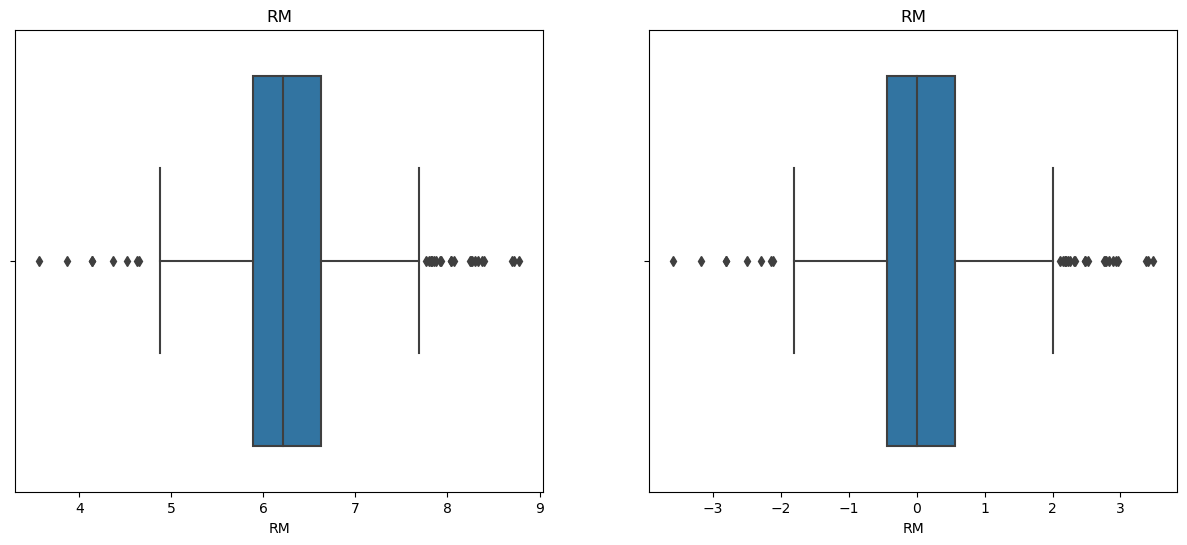

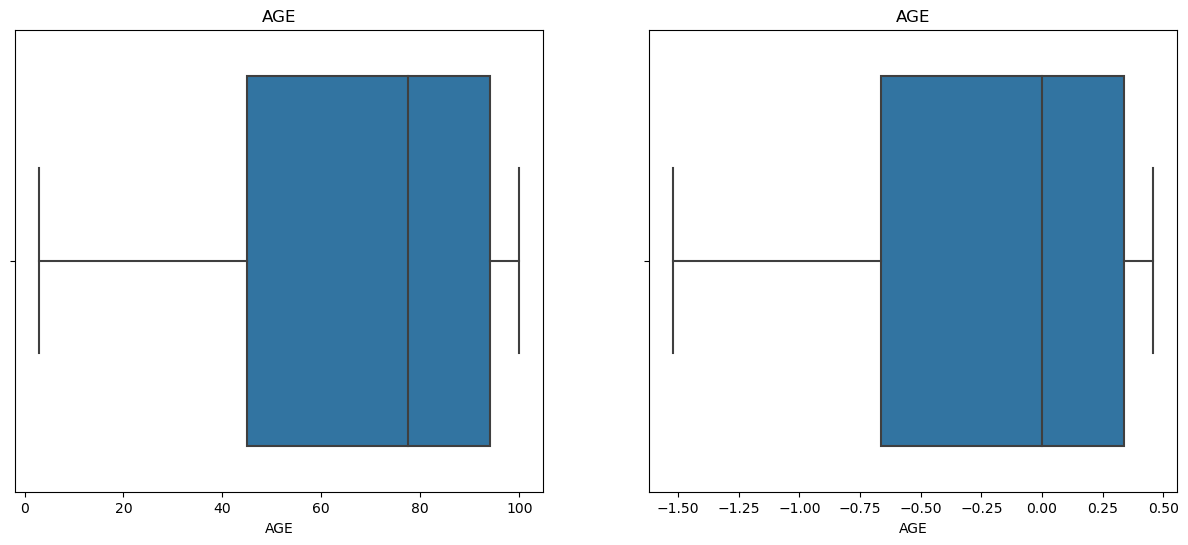

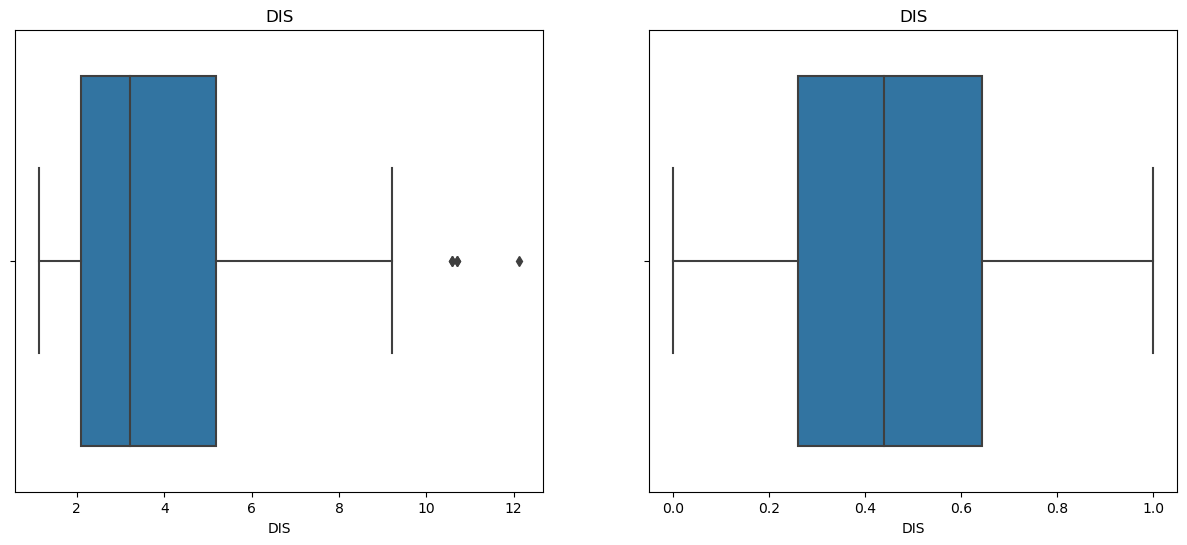

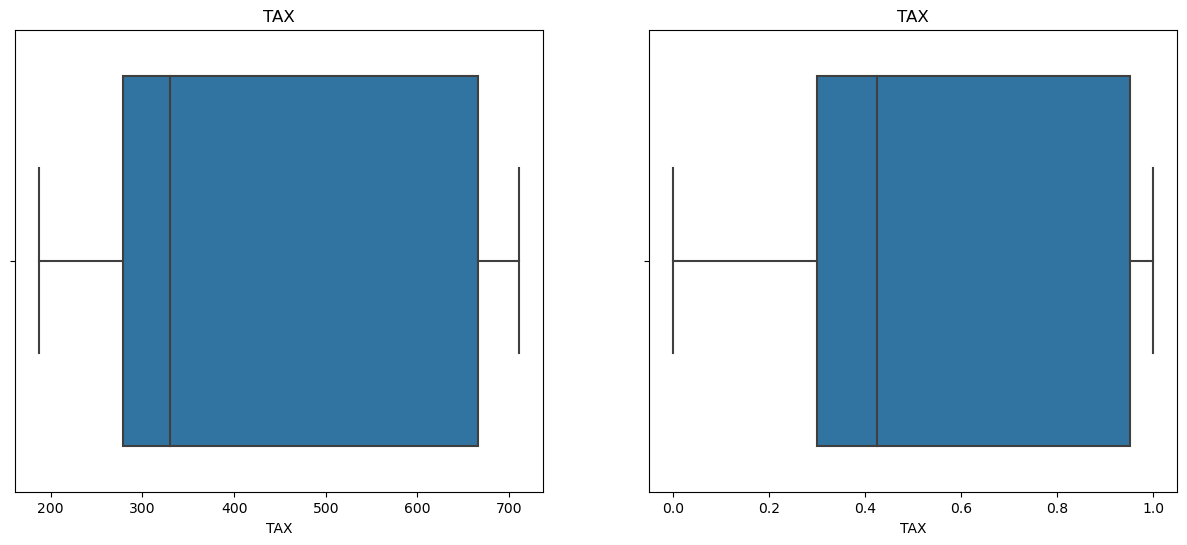

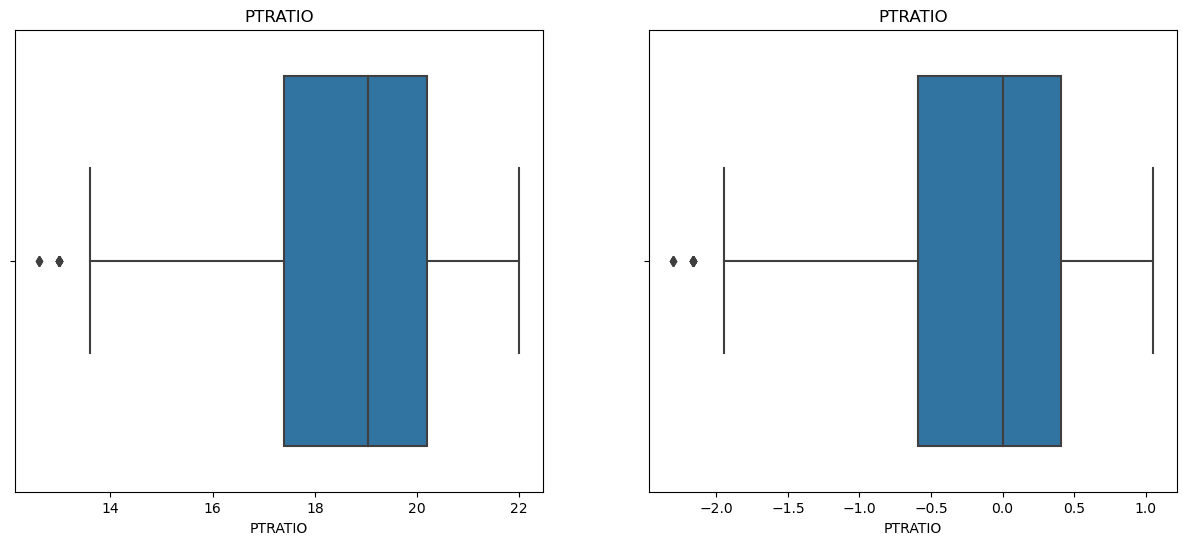

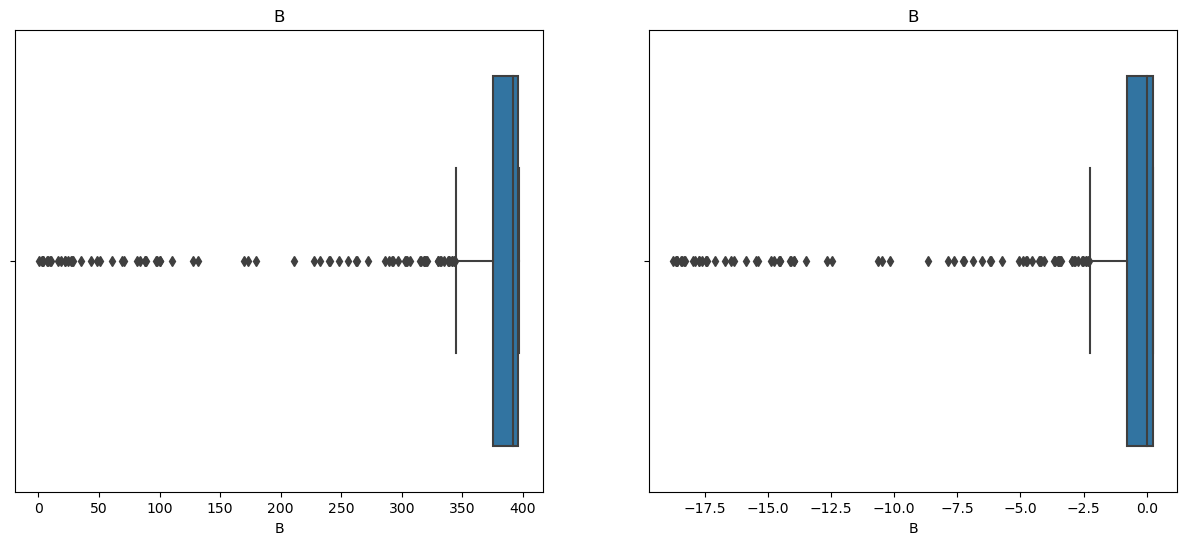

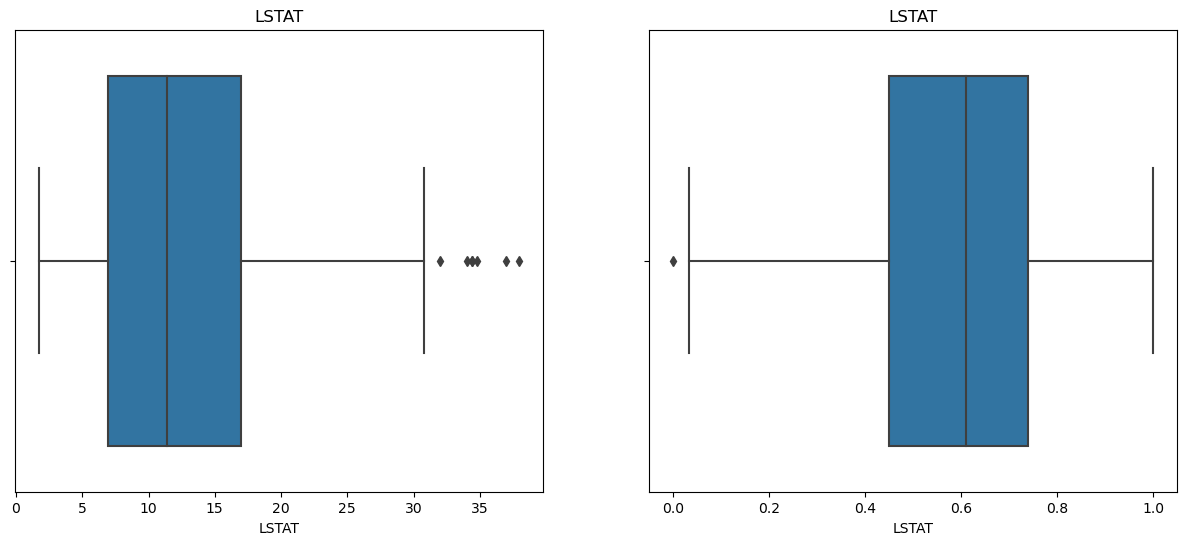

In [20]:
for colum in columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(colum)
    sns.boxplot(x = df_housing[colum])
    plt.subplot(1,2,2)
    plt.title(colum)
    sns.boxplot(x = X[colum])

#### Estudio de las relaciones entre variables.
Estas relaciones las analizamos en el ejericio anterior. Recuperamos las gráficas para apoyarnos en ellas durante el ejercicio.

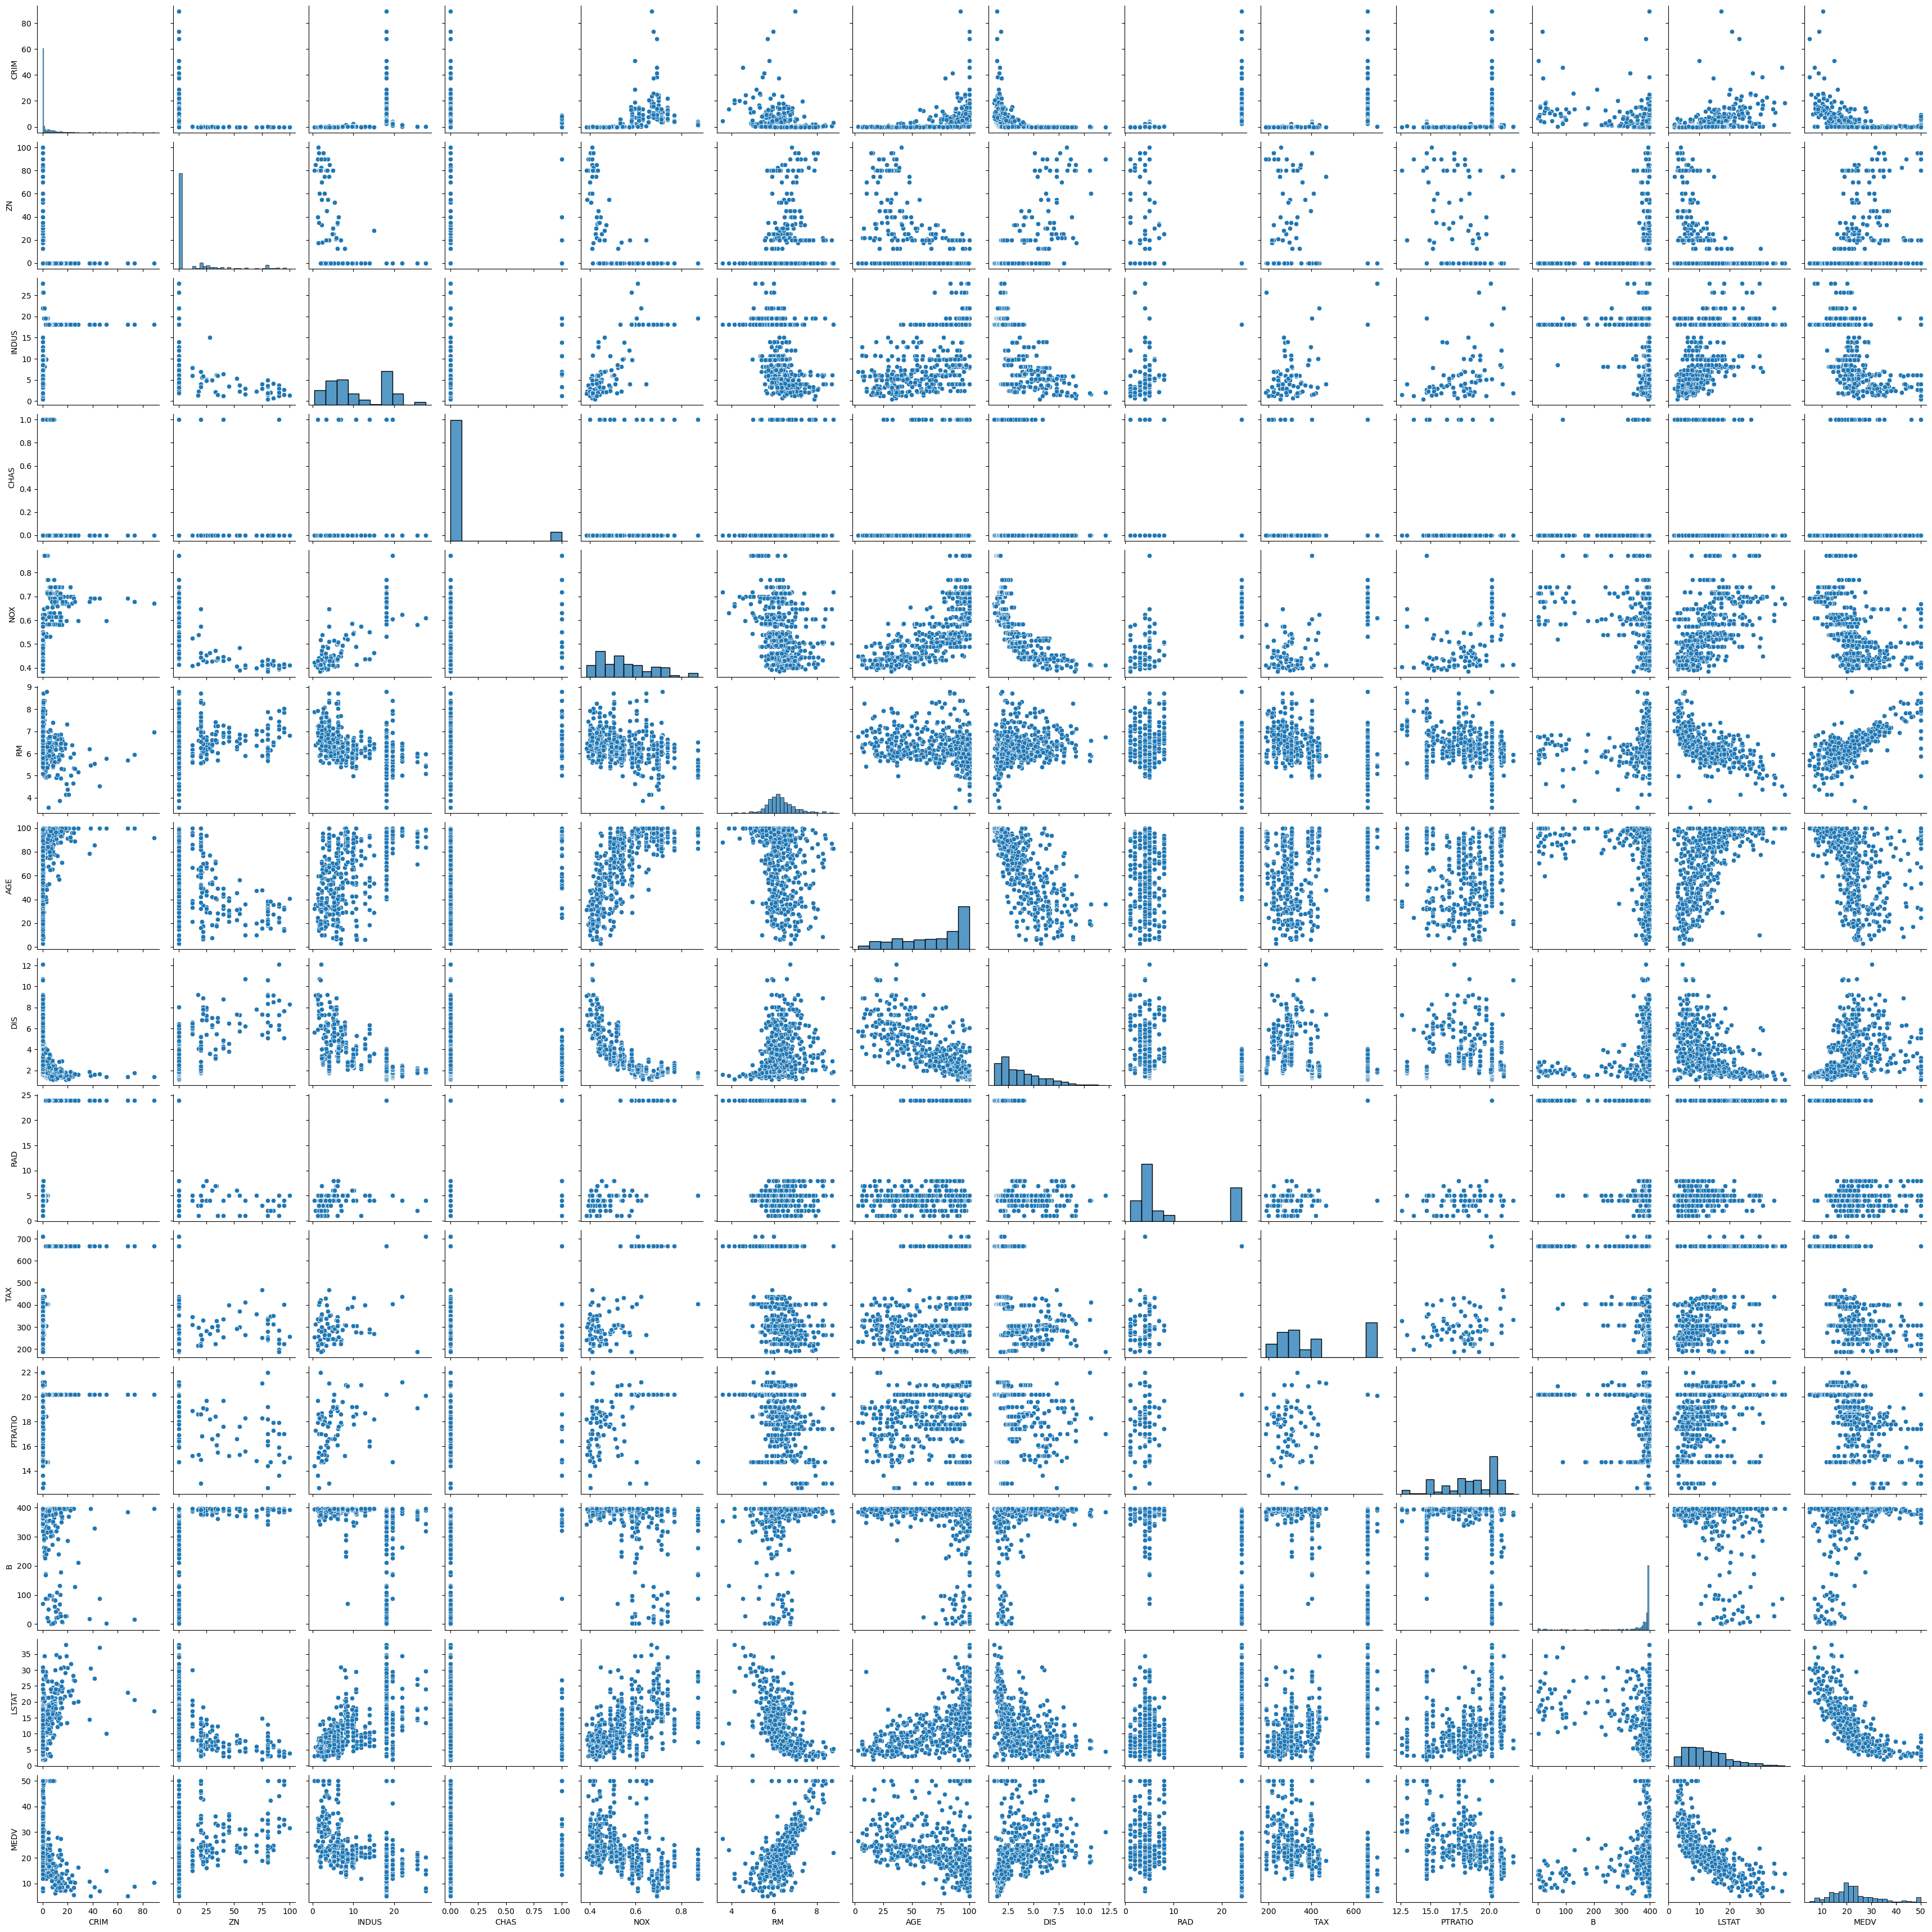

In [21]:
sns.pairplot(df_housing);

## Exercici 1.
### Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

#### El tipo de modelo de regresión a aplicar se define por el tipo de variable objetivo, endógena o target que tengamos. En este caso es una variable continua cuantitativa, lo que indica un modelo de regresión lineal.  
Para poder aplicar esta técnica las variables de nuestro dataset deben cumplir las siguientes condiciones:  
- La variable dependiente (resultado) debe ser escalar (numérica) o bien ordinal de más de 5 categorías.  
- Las variables independientes (explicaciones) deben ser escalares (numérica), ordinales (también se recomienda con más de 5 categorías) o dummy (variables de dos categorías donde una indica existencia o otra no-existencia).  
- Las variables independientes no puede estar altamente correlacionadas entre si.  
- Los registros deben tomarse del dataset de manera aleatoria.  
- Las relaciones entre las variable independientes y la variable dependiente deben ser lineales.  
- Todas las variables (o mejor dicho sus residuales) deben seguir una distribución normal.  
- Homocedasticidad de los residuos (igual dispersión), varianzas iguales a lo largo del tiempo. Cuanto menores sean las varianzas mejor será nuestro modelo.  
- Se recomienda que el número de observaciones sea como mínimo entre 10 y 20 veces el número de predictores del modelo.
- Parsimonia, término que explica que el mejor modelo es aquel capaz de explicar con mayor precisión la variabilidad observada en la variable respuesta empleando el menor número de predictores.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

#### Preparamos nuestro dataset para poder contruir nuestro modelo. Hacemos dos conjuntos, Train para entrenar nuestro modelo, y Test, para testear su eficacia. Tienen una proporción de 67% y 33% respectivamente.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 21) (167, 21) (339,) (167,)


### Modelo Regresión Lineal Simple.
Este modelo es un método estadístico que trata de modelar la relación entre una variable continua y una variable independientes mediante el ajuste de una ecuación lineal.  
Tomamos la variable RM: "Media del número de habitaciones por vivienda" como nuestra variable independiente.

Coeficiente:  [6.85559016]
Constante:  21.857687117900568


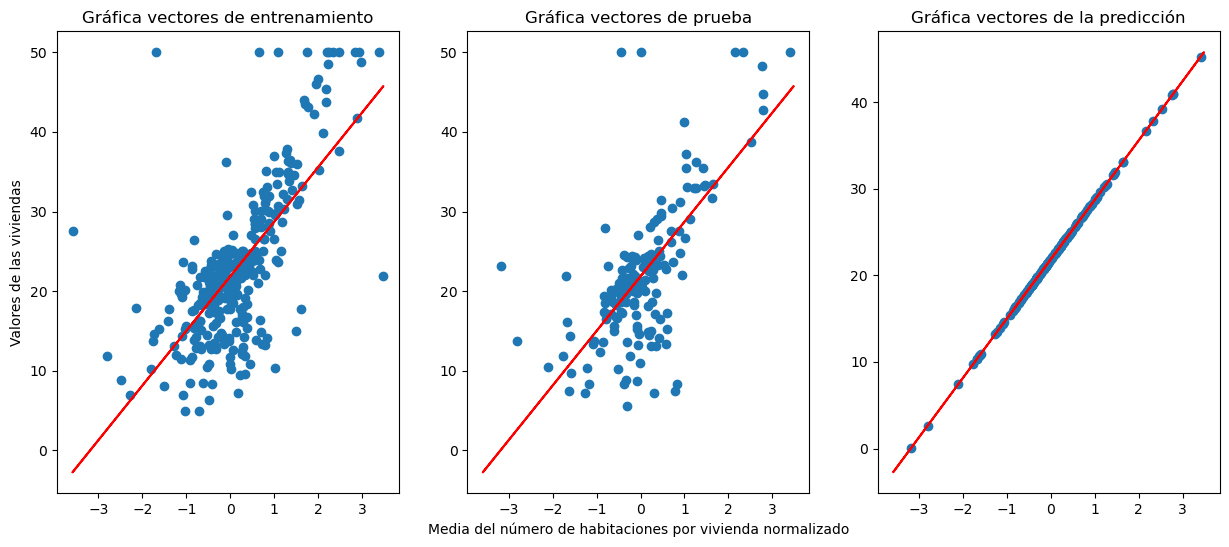

In [24]:
# definimos nuestro modelo
lm = linear_model.LinearRegression()
# entrenamos nuestro modelo
lm.fit(X_train[['RM']],y_train)
# calculamos los coeficientes
print("Coeficiente: ",lm.coef_)
# calculamos la constante cuando x=0
print("Constante: ",lm.intercept_)
# hacemos las predicciones
y_predRL = lm.predict(X_test[['RM']])
# graficamos los resultados
plt.figure(figsize=(15,6))
# gráfica vectores de entrenamiento
plt.subplot(1,3,1)
plt.scatter(X_train[['RM']],y_train)
plt.plot(X_train['RM'], lm.predict(X_train[['RM']]), c='red')
plt.title('Gráfica vectores de entrenamiento')
plt.ylabel('Valores de las viviendas');
# gráfica vectores de prueba
plt.subplot(1,3,2)
plt.scatter(X_test[['RM']],y_test)
plt.plot(X_train['RM'], lm.predict(X_train[['RM']]), c='red')
plt.title('Gráfica vectores de prueba')
plt.xlabel('Media del número de habitaciones por vivienda normalizado');
# gráfica vectores de predicción
plt.subplot(1,3,3)
plt.scatter(X_test[['RM']],y_predRL)
plt.plot(X_train['RM'], lm.predict(X_train[['RM']]), c='red')
plt.title('Gráfica vectores de la predicción');

### Evaluación del modelo

#### Valores estimados y valores reales.
Ordenamos, graficamos y comparamos los valores reales y estimados de nuestra variable objetivo..

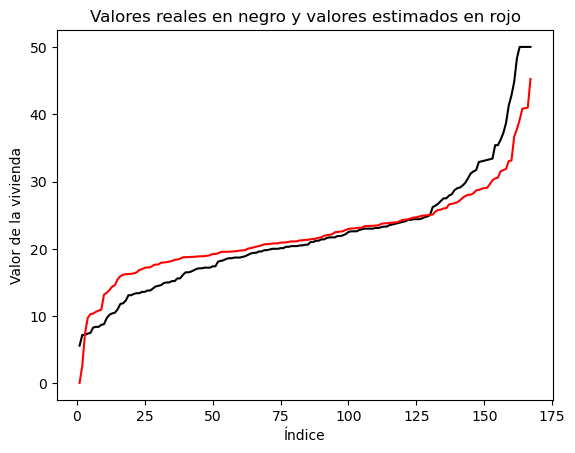

In [25]:
x = range(1,len(y_test)+1)
plt.plot(x, sorted(y_test), color ='black')
plt.plot(x, sorted(y_predRL), color ='red')
plt.title('Valores reales en negro y valores estimados en rojo')
plt.xlabel('Índice')
plt.ylabel('Valor de la vivienda');

#### Vemos que los valores reales y los estimados son bastante parecidos, pero aún podemos mejorar este modelo o buscar un modelos más preciso.

#### Cálculo de los errores absolutos o valores residuales.
Son la diferencia entre el resultado real de nuestro test y lo que ha predecido nuestro modelo, cuanto más cercanos estén a cero más preciso será nuestro modelo.  
Los valores residuales son la principal herramienta de diagnóstico para evaluar y mejorar la regresión.

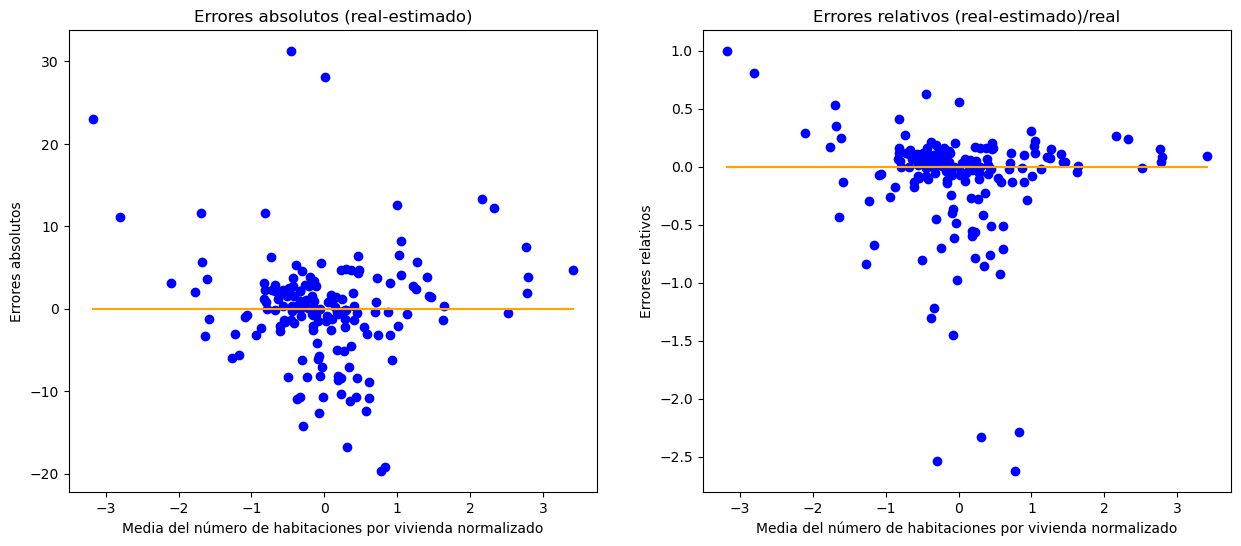

In [26]:
# errores absolutos
err_abs_RL = y_test - y_predRL
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Errores absolutos (real-estimado)')
plt.xlabel('Media del número de habitaciones por vivienda normalizado')
plt.ylabel('Errores absolutos');
plt.scatter(X_test['RM'], err_abs_RL, color='blue')
plt.plot(X_test['RM'], np.zeros(len(err_abs_RL)), color='orange');
# errores relativos
err_rel = (y_test - y_predRL)/y_test
plt.subplot(1,2,2)
plt.title('Errores relativos (real-estimado)/real')
plt.xlabel('Media del número de habitaciones por vivienda normalizado')
plt.ylabel('Errores relativos');
plt.scatter(X_test['RM'], err_rel, color='blue')
plt.plot(X_test['RM'], np.zeros(len(err_rel)), color='orange');

Hemos visto anteriomente que la homocedasticidad de los residuos (igual dispersión) es necesaria para que nuestro modelo sea válido. En las gráficas vemos que esta condición se cumple. Vemos muchos residuos agrupados alrededor del valor cero, que indica que la varianza es constante, y algunos valores alejados del cero, debidos a los outliers. No observamos sesgos o tendencias.

#### Distribución valores residuales.  

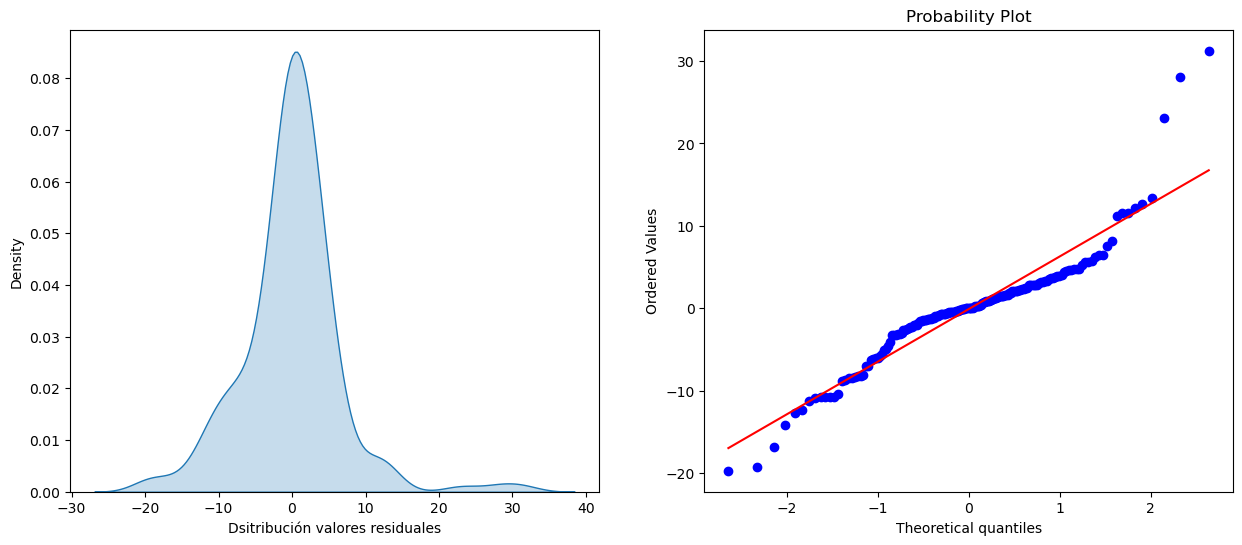

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xlabel('Dsitribución valores residuales')
sns.kdeplot(data = err_abs_RL, fill = True)
plt.subplot(1,2,2)
stats.probplot(err_abs_RL, dist='norm', plot=plt);

La distribución de los residuos se aproxima a una distribución normal, indica que nuestro modelo es válido.

#### Error cuadrático.
Nos proporciona el porcentaje que la/las variables independientes explican de la variable dependiente/objetivo en el modelo.

In [28]:
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test, y_predRL))
R2_RLS = r2_score(y_test, y_predRL)

Variance score: 0.4467


#### Error cuadrático medio.
El error cuadrático es el cuadrado del error absoluto. El error cuadrático medio nos da la media de las distancias entre el valor real y el valor que el modelo predice para cada observación/registro. La distancia de valor 0 sería una predicción perfecta, el modelo será mejor cuanto más cerca esté de 0.  
El objetivo del modelo es que las distancias al valor real sean lo menores posible.

Mean squared error: 44.6075


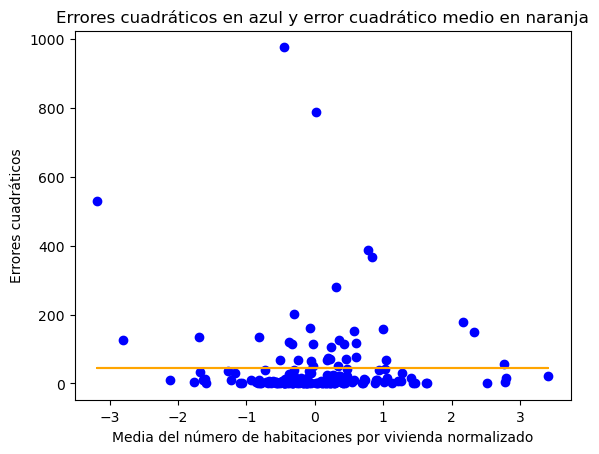

In [29]:
# Error cuadrático.
err_cuad = pow(err_abs_RL,2)
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_predRL))
MSE_RLS = mean_squared_error(y_test, y_predRL)
# los representamos gráficamente
Y_error = np.repeat(MSE_RLS, len(err_cuad))
plt.scatter(X_test['RM'], err_cuad, color='blue')
plt.plot(X_test['RM'], Y_error, color='orange')
plt.title('Errores cuadráticos en azul y error cuadrático medio en naranja')
plt.xlabel('Media del número de habitaciones por vivienda normalizado')
plt.ylabel('Errores cuadráticos');

#### Validamos el modelo.
El estudio de los errores que obtenemos por defecto tras entrenar nuestro modelo es útil para saber cómo está aprendiendo nuestro modelo, aunque no es una estimación realista de cómo se comportará ante nuevas observaciones. Tendremos una estimación más ajustada, incluso antes de utilizar nuestro conjunto Test, si utilizamos una estrategia de validación basada en 'resampling'.  
Para nuestro ejercicio emplearemos RepeatedKFold.

In [30]:
# Validación cruzada repetida
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = lm,  # aquí podríamos pasar también un pipeline
                X         = X_train[['RM']],
                y         = y_train,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_RLS = cv_scores.mean()

Métricas de validación cruzada: [0.56612232 0.20792276 0.57732222 0.66386976 0.40027651 0.50908564
 0.51538774 0.54073544 0.52803122 0.33889113 0.56062738 0.40251229
 0.62136819 0.19722816 0.62119288 0.55059847 0.23536132 0.68135563
 0.40838243 0.63262369 0.5676782  0.5562594  0.40592619 0.52543192
 0.38362911]
Média métricas de validación cruzada: 0.4879127992165918


### Conclusiones modelo Regresión Linear Simple.

#### - El modelo explica con una sola variable el 48,79% de los datos.

### Estudio de la multicolinealidad.
La multicolinealidad es un concepto estadístico que se da en el análisis de regresión cuando dos o más variables explicativas están correlacionadas y la información que obtenemos al incluirlas en nuestro modelo no es independiente o única.  
Antes de hacer un modelo debemos saber si nuestras variables independientes están correlacionadas. Esto ocurre cuando una variable está calculada en base a otra o dos variables independientes dan valores similares. La multicolinealidad influye negativamente en los resultados del modelo de regresión.  
Detectamos la multicolinealidad con una métrica llamada VIF "Variance inflation factor" o "Factor de inflación de la varianza". Los valores para medir la correlación y la fuerza de la correlación son: el factor VIF tiene valor 1, indica que las variables no están correlacionadas, valores entre 1 y 5, indica que están moderadamente correlacionadas y valores entre 5 y 10, áltamente correlacionadas.

#### Vemos la correlación entre las variables

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# las variables dummies no se incluye en la métrica VIF
col_vif = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

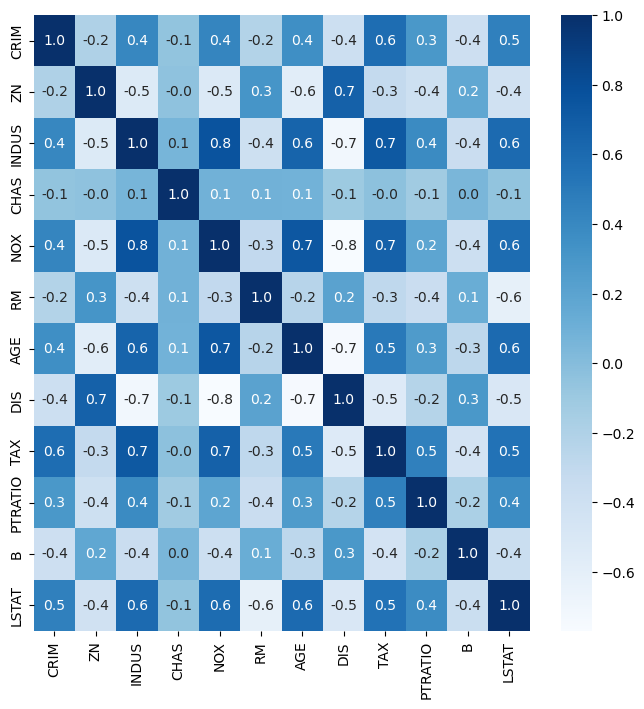

In [33]:
# vemos la matriz de correlación
correlation_matrix = df_housing[col_vif].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues');

In [34]:
# función para calcular VIF
def calculo_vif (X, columnas):
    df_vif = X[columnas] # definimos nuestro dataframe
    vif = pd.DataFrame () # definimos un dataframe vacío para almacenar los resultados
    vif ['VIF'] = [variance_inflation_factor (df_vif.values, i) for i in range (df_vif.shape[1])]
    vif ['variable'] = df_vif.columns
    return vif

In [35]:
# calculamos nuestra métrica VIF
calculo_vif(X, col_vif)

VIF variable
0   25.406327     CRIM
1    2.541573       ZN
2   11.799068    INDUS
3    1.142923     CHAS
4   20.472281      NOX
5    1.748005       RM
6    3.612913      AGE
7   13.104423      DIS
8   16.020035      TAX
9    1.712437  PTRATIO
10   1.490693        B
11  26.059399    LSTAT

Vemos que las variables que tienen valores VIF por encima de 10 son: CRIM, INDUS, NOX, DIS, TAX, LSTAT.  
Eliminaremos la variable CRIM solamente porque la correlación con las demás están entre 0,4 y 0,6 puntos.

In [36]:
# volvemos a definir las variables y a calcular VIF
col_vif = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
calculo_vif(X, col_vif)

VIF variable
0    2.468531       ZN
1   11.794315    INDUS
2    1.139169     CHAS
3   17.353773      NOX
4    1.710471       RM
5    3.612913      AGE
6   13.071141      DIS
7   11.343469      TAX
8    1.708908  PTRATIO
9    1.442227        B
10  24.984137    LSTAT

Vemos que las variables que tienen valores VIF por encima de 10 son las mismas: INDUS, NOX, DIS, TAX, LSTAT. Vuelven a estar correlacionadas, sólo eliminaremos INDUS.

In [37]:
# volvemos a definir las variables y a calcular VIF
col_vif = ['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
calculo_vif(X, col_vif)

VIF variable
0   2.446656       ZN
1   1.126630     CHAS
2  15.146825      NOX
3   1.709756       RM
4   3.596705      AGE
5  12.891556      DIS
6  10.044846      TAX
7   1.699188  PTRATIO
8   1.441073        B
9  23.866328    LSTAT

Vemos que las variables que tienen valores VIF por encima de 10 son las mismas: NOX, DIS, TAX, LSTAT. Vuelven a estar correlacionadas, sólo eliminaremos NOX.

In [38]:
# volvemos a definir las variables y a calcular VIF
col_vif = ['ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
calculo_vif(X, col_vif)

VIF variable
0   2.328650       ZN
1   1.109202     CHAS
2   1.604386       RM
3   3.534512      AGE
4  12.123246      DIS
5   7.129200      TAX
6   1.494560  PTRATIO
7   1.441055        B
8  16.256439    LSTAT

TAX ha bajado de 10, nos quedan por encima de 10 DIS y LSTAT. Eliminamos DIS.

In [39]:
# volvemos a definir las variables y a calcular VIF
col_vif = ['ZN', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']
calculo_vif(X, col_vif)

VIF variable
0  2.086026       ZN
1  1.108372     CHAS
2  1.334459       RM
3  1.734049      AGE
4  6.746934      TAX
5  1.491263  PTRATIO
6  1.397839        B
7  6.534175    LSTAT

Ahora tenemos todas las variables por debajo de 10.

In [40]:
# redefinimos nuestro dataframe reduciendo columnas y añadiendo la variable dummie
X_NM = X.drop(['CRIM', 'INDUS', 'NOX', 'DIS'], axis=1).copy()
# redefinimos los conjuntos X_train y X_test
X_NM_train, X_NM_test, y_train, y_test = train_test_split(X_NM, y, test_size=0.33, random_state = 0)
print(X_NM_train.shape, X_NM_test.shape, y_train.shape, y_test.shape)

(339, 17) (167, 17) (339,) (167,)


### Modelo Regresión Linear Múltiple. Métodos OLS.
Este modelo es un método estadístico que trata de modelar la relación entre una variable continua y dos o más variables independientes (hasta un máximo de trece) mediante el ajuste de una ecuación lineal.  
El método que usamos para estimar sus parámetros es el OLS, "Ordinary least squares " o "Mínimos cuadrados ordinarios". Este método tiene tres limitaciones:
- como hemos visto anteriormente las variables correlacionadas les hacen perder precisión,
- no realizan selección de predictores, todos se incorporan al modelo aunque no aporten información relevante,
- no pueden ajustarse aunque el número de variables sea superior al número de registros.

In [41]:
regr = linear_model.LinearRegression()
regr.fit(X_NM_train, y_train)
# coeficientes
print('Coefficients: \n', regr.coef_)
# Hacemos la predicción
y_predRLM = regr.predict(X_NM_test)
# Precisión del modelo
print("Precisión del modelo:", regr.score(X_NM_test, y_test))
# Error absoluto medio
print("Mean absolute error: %.4f" % mean_absolute_error(y_test, y_predRLM))
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_predRLM))
MSE_RLM = mean_squared_error(y_test, y_predRLM)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test, y_predRLM))
R2_RLM = r2_score(y_test, y_predRLM)

Coefficients: 
 [ -0.07537563   2.10708907   1.9546119    1.91876867  -4.55225014
  -2.93462082   0.13918552 -29.6016217   -2.72872395  -0.14988268
   1.26835522   0.24934359  -0.11787943  -0.81951581  -0.15674915
  -0.13970908   2.5947613 ]
Precisión del modelo: 0.6833108934734944
Mean absolute error: 3.4284
Mean squared error: 25.5322
Variance score: 0.6833


#### Validamos el modelo.

In [42]:
# Validación cruzada repetida
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = regr,
                X         = X_NM_train,
                y         = y_train,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_RLM = cv_scores.mean()

Métricas de validación cruzada: [0.81042895 0.60325405 0.78270443 0.83667506 0.68193101 0.80634868
 0.74662839 0.80789779 0.76344359 0.6856979  0.77790579 0.74332283
 0.76960843 0.77428391 0.75477603 0.77788143 0.71602982 0.81088056
 0.77015394 0.73048858 0.8330783  0.81017744 0.75230633 0.76697011
 0.66368505]
Média métricas de validación cruzada: 0.759062335479268


#### Evaluación del modelo.

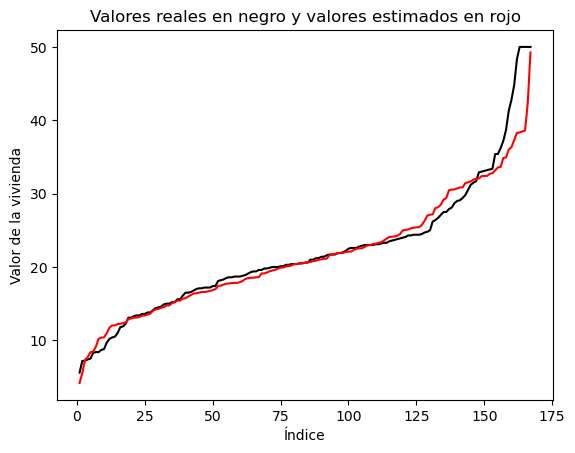

In [43]:
x = range(1,len(y_test)+1)
plt.plot(x, sorted(y_test), color ='black')
plt.plot(x, sorted(y_predRLM), color ='red')
plt.title('Valores reales en negro y valores estimados en rojo')
plt.xlabel('Índice')
plt.ylabel('Valor de la vivienda');

Observamos en la gráfica que el modelo está bien ajustado entre los valores 15000 y 25000$. Por debajo y por encima de esos valores, si bien se aproxima, se puede mejorar la precisión.

#### Distrución de valores residuales.

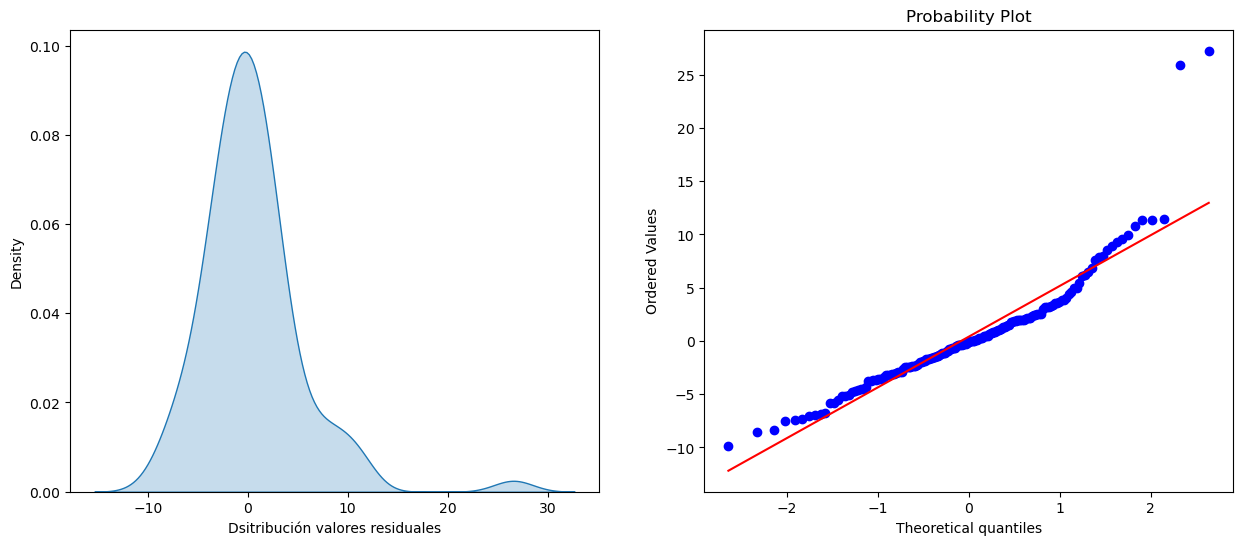

In [44]:
err_abs_RLM = y_test - y_predRLM
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xlabel('Dsitribución valores residuales')
sns.kdeplot(data = err_abs_RLM, fill = True); 
plt.subplot(1,2,2)
stats.probplot(err_abs_RLM, dist='norm', plot=plt);

La distribución de los residuos parece que está normalizada pero tiene una cola larga a derecha. Esto see refleja en una curvatura en el gráfico de cuantiles teóricos e indica una asimetría en la distribución.

### Conclusión modelo Regresión Linear Múltiple.  
Vemos que incorporar otras variables independientes al modelo mejora ostensiblemente la predicción.

### Modelo Ridge. Modelos con regularización o Shrinkage
Como alternativa al ajuste por mínimos cuadrados ordinarios (OLS) está la regularización, también conocida con Shrinkage, que fuerza a que los coeficientes tiendan a cero.
Estos modelos atenúa las limitaciones asociadas a los modelos de regresión lineal descritas anteriormente, de esta manera se minimiza el riesgo de "overfiting", se reduce la varianza, se atenúa el efecto de la correlación entre predictores y se reduce la influencia de las variables menos relevantes.  
Los métodos de regularización, Ridge, Lasso y Elastic net son los más empleados, actúan sobre la magnitud de los coeficientes del modelo, por este motivo las variables deben estar estandarizadas o normalizadas.  
Estos métodos son muy últiles cuando hay más variables que registros.

En este ejercicio utilizaremos regulación Ridge "l2". Ridge penaliza la suma de los coeficientes elevados al cuadrado, así reduce de forma proporcional el valor de todos los coeficientes sin llegar a cero, así no se excluye ningún predictor, frente a la regularización Lasso "l1" que es más restrictiva y sí los elimina.  
Con el hiperparámetro λ controlamos la penalización, cuando es cero el modelo equivale a un modelo lineal ajustado por OLS, a medida que aumenta, aumenta la penalización y disminuye el valor de los predictores.  
Un modelo OLS puede tener una relación casi lineal entre la varible objetivo y los predictores y un bajo bias, y aún así tener una alta varianza (pequeños cambios en los datos de entrenamiento tienen mucho impacto en el modelo resultante). Los modelos con regularización tienen la ventaja de que disminuyen la varianza sin aumentar el bias y consiguen un menor error total.

In [45]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()
ridge.fit(X_NM_train, y_train)
# coeficientes
print('Coefficients: \n', ridge.coef_)
# Hacemos la predicción
y_predRG = ridge.predict(X_NM_test)
# Error absoluto medio
print("Mean absolute error: %.4f" % mean_absolute_error(y_test, y_predRG))
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_predRG))
MSE_RRd = mean_squared_error(y_test, y_predRG)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test, y_predRG))
R2_RRd = r2_score(y_test, y_predRG)

Coefficients: 
 [ -0.0452174    2.26434869   2.54776904   1.06236752  -3.7798647
  -2.92370801   0.16721058 -23.81074983  -2.51868001  -0.04224353
   1.45137363   0.17563878   0.08871923  -0.98134866  -0.13488916
   0.04228764   1.91914208]
Mean absolute error: 3.4103
Mean squared error: 26.1856
Variance score: 0.6752


#### Validación del modelo.

In [46]:
# Validación cruzada repetida
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = ridge,
                X         = X_NM_train,
                y         = y_train,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_Ridge = cv_scores.mean()

Métricas de validación cruzada: [0.83430855 0.53282316 0.78486573 0.84631461 0.73294663 0.78435467
 0.76772989 0.81268284 0.77795725 0.62887477 0.79998339 0.70621177
 0.80192064 0.74765447 0.75962835 0.78729786 0.66148741 0.83267389
 0.76561452 0.74290183 0.82335135 0.81227937 0.69939006 0.76672887
 0.70098192]
Média métricas de validación cruzada: 0.7564385513107159


#### Evaluación del modelo.

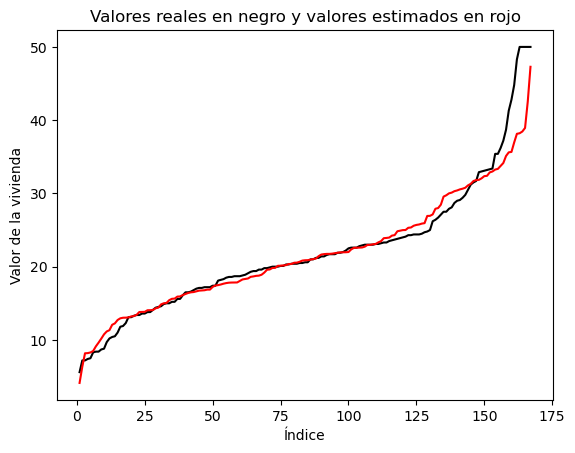

In [47]:
x = range(1,len(y_test)+1)
plt.plot(x, sorted(y_test), color ='black')
plt.plot(x, sorted(y_predRG), color ='red')
plt.title('Valores reales en negro y valores estimados en rojo')
plt.xlabel('Índice')
plt.ylabel('Valor de la vivienda');

La distribución es muy similar al modelo anterior.

#### Distribución de valores residuales.

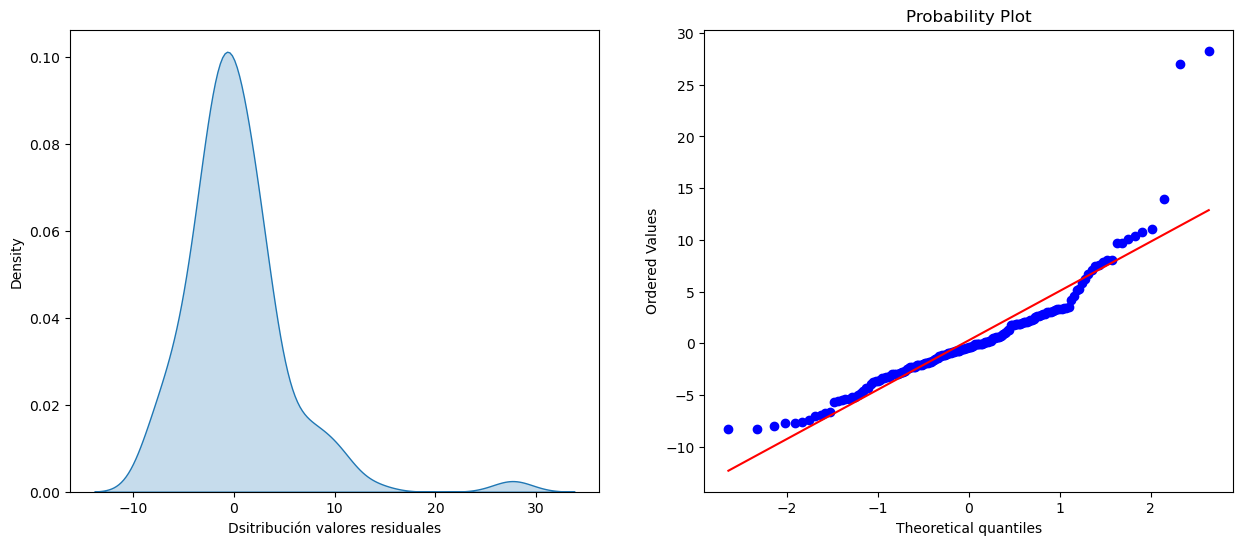

In [48]:
err_abs_RG = y_test - y_predRG
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xlabel('Dsitribución valores residuales')
sns.kdeplot(data = err_abs_RG, fill = True)
plt.subplot(1,2,2)
stats.probplot(err_abs_RG, dist='norm', plot=plt);

### Conclusión modelo Ridge.
Con este modelo se obtienen resultados muy parecidos o peores que en el de regresión múltiple. Vemos que la regualrización en este caso no aporta valor a la predicción.

### Modelo XGBoost Regressor. Modelos de árboles de decisión.
Extreme Gradient Boosting es una biblioteca de código abierto para implementar algoritmos de aumento de gradiente. Estos algoritmos son una clase de algoritmos conjuntos de aprendizaje automático que se pueden utiliar en un modelado predictivo de regresión. Los conjuntos se construyen a partir de modelos de árboles de decisión. Los árboles se agregan uno a la vez al conjunto y se ajustan para corregir los errores de predicción realizados por modelos anteriores.  
Está diseñado para ser computacionalmente eficiente, rápido de ejecutar, y altamente efectivo. Las dos razones principales para utilizar XGBoost son la velocidad de ejecución y el rendimiento del modelo.

In [49]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(objective ='reg:squarederror', seed = 0)
XGBR.fit(X_NM_train, y_train)
# Hacemos la predicción
y_predXGBR = XGBR.predict(X_NM_test)
# Error absoluto medio
print("Mean absolute error: %.4f" % mean_absolute_error(y_test, y_predXGBR))
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_predXGBR))
MSE_XGBR = mean_squared_error(y_test, y_predXGBR)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test, y_predXGBR))
R2_XGBR = r2_score(y_test, y_predXGBR)

Mean absolute error: 2.6493
Mean squared error: 18.4583
Variance score: 0.7711


#### Validamos el modelo.

In [50]:
# Validación cruzada repetida
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = XGBR,  # aquí podríamos pasar también un pipeline
                X         = X_NM_train,
                y         = y_train,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_XGBR = cv_scores.mean()

Métricas de validación cruzada: [0.86111151 0.66757199 0.84787356 0.84506509 0.82040081 0.88904987
 0.8545224  0.90154584 0.78496201 0.73518744 0.86459843 0.85938491
 0.88158608 0.85333788 0.778757   0.87377416 0.73497686 0.87287142
 0.87532324 0.8358617  0.91739782 0.86295305 0.8103816  0.78409404
 0.82282341]
Media métricas de validación cruzada: 0.83341648450355


#### Evaluación del modelo.

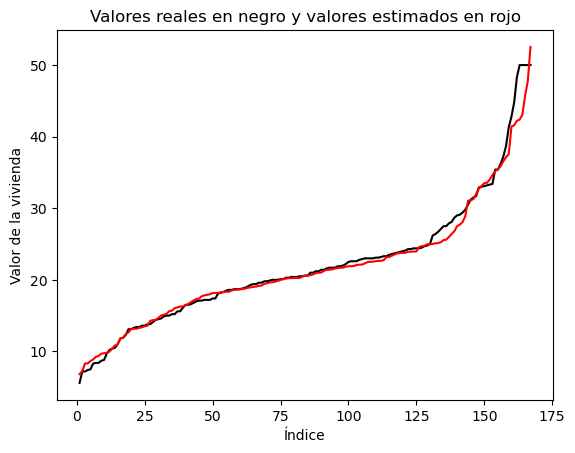

In [51]:
x = range(1,len(y_test)+1)
plt.plot(x, sorted(y_test), color ='black')
plt.plot(x, sorted(y_predXGBR), color ='red')
plt.title('Valores reales en negro y valores estimados en rojo')
plt.xlabel('Índice')
plt.ylabel('Valor de la vivienda');

Obsevamos que el modelo ha mejorado la predicción en valores menores a 15000 dólares. Por encima de 25000 dólares también es más preciso pero aún hay franjas de precio que se deben ajustar.

#### Distribución de valores absolutos.

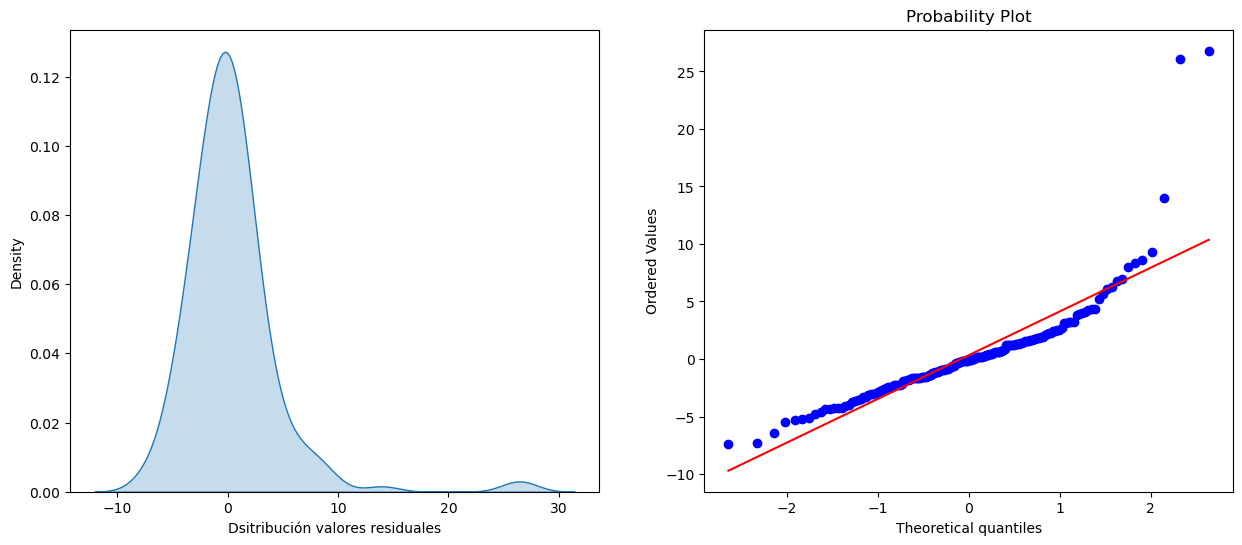

In [52]:
err_abs_XGBR = y_test - y_predXGBR
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.xlabel('Dsitribución valores residuales')
sns.kdeplot(data = err_abs_XGBR, fill = True)
plt.subplot(1,2,2)
stats.probplot(err_abs_XGBR, dist='norm', plot=plt);

La distribución de los residuos en este modelos mantiene la asimetría, aún así valida el modelo.

#### Conclusiones del modelo XGBoost Regression.  
El modelo de árboles de decisión mejora la predicción de los modelos anteriores.

### Exercici 2.
#### Compara’ls en base al MSE i al R2.
Añadimos a la comparación el valor medio de R2 obtenido con Cross Validation con RepeatedKFold y 5 particiones.

In [53]:
df_errores = pd.DataFrame([[MSE_RLS,R2_RLS,cv_sc_mean_RLS],[MSE_RLM,R2_RLM,cv_sc_mean_RLM],[MSE_RRd,R2_RRd,cv_sc_mean_Ridge],[MSE_XGBR,R2_XGBR,cv_sc_mean_XGBR]], columns = ['MSE','R2', 'R2_CV_5'], index = ['Regresión Linear Simple','Regresión Linear Múltiple', 'Ridge', 'XGBoost'])
df_errores

MSE        R2   R2_CV_5
Regresión Linear Simple    44.607529  0.446709  0.487913
Regresión Linear Múltiple  25.532153  0.683311  0.759062
Ridge                      26.185573  0.675206  0.756439
XGBoost                    18.458345  0.771051  0.833416

La comparativa nos muestra que todo los modelos han mejorado después de hacer un Cross Validation.  
Un modelo de regresión Linear Simple con una sola variable, aunque sea explicativa en un 48%, es fácilmente mejorable.  
La regularización Ridge no mejora la predicción del modelo Regresión Linear Múltiple, podemos concluir que el estudio de la multicolinealidad ha hecho que las variables usadas ya no estén correlacionadas y eso hace que la mejora sea difícil.  
El modelo XGBoost de árboles de decición ha resultado ser el más preciso.

#### Comparamos los modelos tambien en base a sus valores residuales.

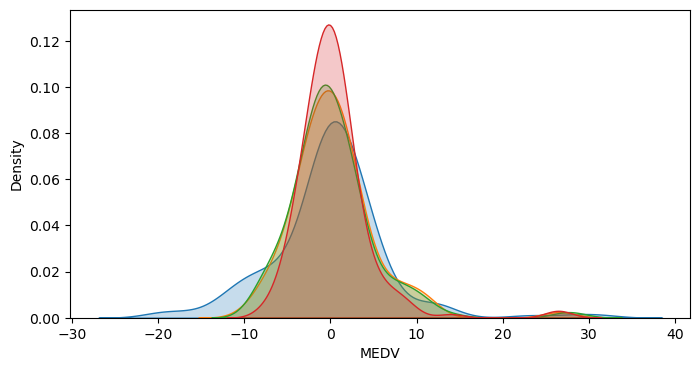

In [54]:
modelos = ('Regresión Linear Simple', 'Regresiónsión Linear Múltiple', 'Regresión Ridge', 'Regresión XGBoost')
resultados = (y_predRL, y_predRLM, y_predRG, y_predXGBR)
plt.figure(figsize=(8,4))
for i in resultados:
    residuales = y_test - i
    sns.kdeplot(data = residuales, fill = True);

Observamos que a medida que la densidad en torno a cero crece las colas se aplanan, esto indica que el modelo tiene una mejor predicción, más valores residuales con valor cero y más cercana la distribución a una distribución normal.  
La gráfica en color rosa corresponde al mejor modelo, XGBoost y la gráfica en azul corresponde al peor, Regresión Linear Simple.

### Exercici 3.
#### Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

### GridSearch.
Para ver cómo se comportan nuestros modelos variando sus parámetros empleamos GridSearch, una técnica de validación cruzada que ajusta nuestro modelo entre varios parámetros que le damos. Tenemos la opción de que nos devuelva los mejores valores y combinaciones entre todos los que ha analizado. 

In [55]:
from sklearn.model_selection import GridSearchCV

### Modelo Regresión linear simple con GridSearch.

Obtenemos los parámetros del modelo.

In [56]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Sólo podemos variar si tener en cuenta o no la constante de nuestra linea de predicción.

In [57]:
model = lm
fit_intercept_RL = [True, False]
grid_RL = GridSearchCV(estimator = model,
                    param_grid = dict(fit_intercept = fit_intercept_RL),
                    verbose = 1)
grid_RL.fit(X_NM_train, y_train)
print ("Mejores parámetros: {}".format (grid_RL.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores parámetros: {'fit_intercept': True}


El resultado es el que ya estamos usando, incluir la constante en nuestro modelo.

#### Guardamos el modelo.

In [58]:
import joblib
joblib.dump(lm, 'Modelo Regresion Linear Simple.pkl')

['Modelo Regresion Linear Simple.pkl']

### Modelo Regresión linear múltiple con GridSearch.

Obtenemos los parámetros del modelo.

In [59]:
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [60]:
model = regr
fit_intercept_RLM = [True, False]
grid_RLM = GridSearchCV(estimator = model,
                    param_grid = dict(fit_intercept = fit_intercept_RLM),
                    scoring   = 'neg_mean_squared_error',
                    verbose = 1)
grid_RLM.fit(X_NM_train, y_train)
print ("Mejores parámetros: {}".format (grid_RLM.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mejores parámetros: {'fit_intercept': False}


Ya tenemos nuestro modelos contruído con los mejores parámetros.

#### Guardamos el modelo.

In [61]:
import joblib
joblib.dump(regr, 'Modelo Regresion Linear Múltiple.pkl')

['Modelo Regresion Linear Múltiple.pkl']

### Modelo Ridge con GridSearch.

Obtenemos los parámetros del modelo.

In [62]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [63]:
alphas = np.array([100, 75, 50, 25, 5, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01])
model = ridge
fit_intercept_ridge = [True, False]
grid_ridge = GridSearchCV(estimator = model,
                    param_grid = dict(alpha = alphas,
                    fit_intercept = fit_intercept_ridge),
                    scoring   = 'neg_mean_squared_error',
                    verbose = 1)
grid_ridge.fit(X_NM_train, y_train)
print ("Mejores parámetros: {}".format (grid_ridge.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'alpha': 0.1, 'fit_intercept': True}


La mejor Alpha es 0.1.

### Modelo Ridge con RandomizedSearch.

Vamos a ver qué parámetros nos daría si  RandomizedSearch y comprobaremos si mejora nuestro modelo.

In [64]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
model = ridge
param_grid_ridge_random = dict(alpha = uniform())
grid_ridge_random = RandomizedSearchCV(estimator=model,
                          param_distributions=param_grid_ridge_random,
                          n_iter=100,
                          random_state=0,
                          scoring   = 'neg_mean_squared_error',
                          verbose = 1)
                          
grid_ridge_random.fit(X_NM_train, y_train)
print ("Mejores parámetros: {}".format (grid_ridge_random.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros: {'alpha': 0.13179786240439217}


RandomizedSearch nos devuelve un Alpha cercana a la que ya teníamos 0.13179786240439217, vamos a comprobar si este ajuste mejora nuestro modelo.

### Modelo Ridge con los mejores hiperparámetros.

In [65]:
ridge_hiper = linear_model.Ridge(alpha = 0.13179786240439217)
ridge_hiper.fit(X_NM_train, y_train)
# coeficientes
print('Coefficients: \n', ridge_hiper.coef_)
# Hacemos la predicción
y_predRG_hiper = ridge_hiper.predict(X_NM_test)
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_predRG_hiper))
MSE_RRd_hiper = mean_squared_error(y_test, y_predRG_hiper)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test, y_predRG_hiper))
R2_RRd_hiper = r2_score(y_test, y_predRG_hiper)

Coefficients: 
 [ -0.07063913   2.13576992   2.04977305   1.78057257  -4.42577386
  -2.93311835   0.1436308  -28.67512214  -2.69817886  -0.13115195
   1.30048361   0.23791481  -0.08425123  -0.84787354  -0.1531616
  -0.10955972   2.48577849]
Mean squared error: 25.5887
Variance score: 0.6826


La predicción mejora de 0,6752 a 0,6826 la varianza.

### Modelo XGBoost Regression con GridSearch.

Vemos con qué parámetros trabaja nuestro modelo.

In [66]:
XGBR.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'seed': 0}

#### Vamos a ajustar los hiperparámetros más frecuentes:
- n_estimators: El número de árboles en el conjunto, a menudo aumenta hasta que no se observan más mejoras, lo dejaremos por defecto en 100.
- max_depth: “Profundidad” o número de nodos de bifurcación de los árboles de decisión usados en el entrenamiento. Aunque una mayor profundidad puede devolver mejores resultados, también puede resultar en overfitting (sobre ajuste). A menudo los valores están entre 1 y 10.
- learning_rate: La tasa de aprendizaje utilizada para ponderar cada modelo, a menudo establecida en valores pequeños como 0.3, 0.1, 0.01 o menores.
- colsample_bytree: Número de características (columnas) utilizadas en cada árbol, establecido en un valor entre 0 y 1, a menudo 1.0 para usar todas las características.

In [67]:
model = XGBR
grid_XGBR = GridSearchCV(estimator = model,
                    param_grid = {'max_depth': [2,4,9], 'learning_rate': [0.02, 0.03, 0.1], 'colsample_bytree': [0.3, 0.7]},
                    scoring='neg_mean_squared_error',
                    verbose = 1)
grid_XGBR.fit(X_NM_train, y_train)
print ("Mejores parámetros: {}".format (grid_XGBR.best_params_))
GridSearch_XGBR = grid_XGBR.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 9}


### Modelo XGBoost Regression con RandomizedSearch.
Vamos a ver qué valores obtenemos y si mejoran nuestro modelo.

In [68]:
model = XGBR
param_grid_XGBR_random = dict(alpha = uniform())
grid_XGBR_random = RandomizedSearchCV(estimator=model,
                          param_distributions=param_grid_XGBR_random,
                          n_iter=100,
                          random_state=0,
                          scoring   = 'neg_mean_squared_error',
                          verbose = 1)
                          
grid_XGBR_random.fit(X_NM_train, y_train)
print ("Mejores parámetros: {}".format (grid_XGBR_random.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros: {'alpha': 0.9292961975762141}


### Modelo XGBoost Regression con los mejores hiperparámetros.

In [69]:
XGBR_hiper = XGBRegressor(objective ='reg:squarederror', seed = 0, alpha = 0.9292961975762141, colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 9)
XGBR_hiper.fit(X_NM_train, y_train)
# Hacemos la predicción
y_predXGBR_hiper = XGBR_hiper.predict(X_NM_test)
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_predXGBR_hiper))
MSE_XGBR_hiper = mean_squared_error(y_test, y_predXGBR_hiper)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test, y_predXGBR_hiper))
R2_XGBR_hiper = r2_score(y_test, y_predXGBR_hiper)

Mean squared error: 19.3929
Variance score: 0.7595


### Comparamos los modelos después de hacer Grid Search y elegir los mejores parámetros.

In [70]:
df_errores = pd.DataFrame([[MSE_RLS,R2_RLS,cv_sc_mean_RLS],[MSE_RLM,R2_RLM,cv_sc_mean_RLM],[MSE_RRd,R2_RRd,cv_sc_mean_Ridge,MSE_RRd_hiper,R2_RRd_hiper],[MSE_XGBR,R2_XGBR,cv_sc_mean_XGBR,MSE_XGBR_hiper,R2_XGBR_hiper]], columns = ['MSE','R2', 'R2_CV_5','MSE_Hiper','R2_Hiper'], index = ['Regresión Linear Simple','Regresión Linear Múltiple', 'Ridge', 'XGBoost'])
df_errores

MSE        R2   R2_CV_5  MSE_Hiper  R2_Hiper
Regresión Linear Simple    44.607529  0.446709  0.487913        NaN       NaN
Regresión Linear Múltiple  25.532153  0.683311  0.759062        NaN       NaN
Ridge                      26.185573  0.675206  0.756439  25.588655  0.682610
XGBoost                    18.458345  0.771051  0.833416  19.392931  0.759459

Concluimos que en este ejercicio los mejores hiperparámetros no mejoran la predicción de Cross Validation. Entendemos qie el modelo está bastante ajustado desde el principio y que el entrenamiento con distintos bloques en Cross Validation es lo que le hace mejorar la predicción.

### Exercici 4.
#### Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

### Modelo Regresión Linear Simple con todos los datos.  
Hacemos una predicción con nuestro modelo "lm" con todos los datos del dataset, sin tener en cuenta los conjuntos Train y Test.

In [71]:
model = lm
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = model,  # aquí podríamos pasar también un pipeline
                X         = X_train[['RM']],
                y         = y_train,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_RLS_completo = cv_scores.mean()

Métricas de validación cruzada: [0.56612232 0.20792276 0.57732222 0.66386976 0.40027651 0.50908564
 0.51538774 0.54073544 0.52803122 0.33889113 0.56062738 0.40251229
 0.62136819 0.19722816 0.62119288 0.55059847 0.23536132 0.68135563
 0.40838243 0.63262369 0.5676782  0.5562594  0.40592619 0.52543192
 0.38362911]
Média métricas de validación cruzada: 0.4879127992165918


### Modelo Regresión Linear Múltiple con todos los datos.  
Hacemos una predicción con nuestro modelo "regr" con todos los datos del dataset, sin tener en cuenta los conjuntos Train y Test.

In [72]:
# Validación cruzada repetida
model = regr
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = model,
                X         = X_NM,
                y         = y,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_RLM_copleto = cv_scores.mean()

Métricas de validación cruzada: [0.59222032 0.79787669 0.69285412 0.75446697 0.82580057 0.69275051
 0.71305442 0.81510563 0.74706229 0.81956949 0.66961161 0.84545386
 0.72571827 0.80180325 0.68980183 0.85484621 0.70939029 0.69334936
 0.72595041 0.68860719 0.78241808 0.78648415 0.73904332 0.73145805
 0.73466657]
Média métricas de validación cruzada: 0.745174538353326


### Modelo Ridge con todos los datos.  
Hacemos una predicción con nuestro modelo "ridge_hiper", entrenado con los hiperparámetros, con todos los datos del dataset, sin tener en cuenta los conjuntos Train y Test.

In [73]:
model = ridge_hiper
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = model,
                X         = X_NM,
                y         = y,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
R2_RRd_hiper_completo = cv_scores.mean()

Métricas de validación cruzada: [0.59026069 0.79990157 0.69430935 0.75102825 0.82747678 0.69229279
 0.71233962 0.81438166 0.75029451 0.81867752 0.66904196 0.84513544
 0.72761657 0.80168731 0.689639   0.85363476 0.71087169 0.68861666
 0.72778171 0.69233983 0.78313764 0.78671726 0.73934308 0.7306672
 0.73401398]
Média métricas de validación cruzada: 0.7452482727883494


### Modelo XGBoost Regression con todos los datos.
Hacemos una predicción con nuestro modelo "XGBR_hiper", entrenado con los hiperparámetros, con todos los datos del dataset, sin tener en cuenta los conjuntos Train y Test.

In [74]:
model = XGBR_hiper
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = model,  # aquí podríamos pasar también un pipeline
                X         = X_NM,
                y         = y,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")
R2_XGBR_hiper_completo = cv_scores.mean()

Métricas de validación cruzada: [0.68094185 0.89788101 0.78893035 0.77123791 0.89500668 0.78096032
 0.78685698 0.81845247 0.88831637 0.86787629 0.77354583 0.90991483
 0.78246217 0.8903923  0.73840774 0.91965244 0.80408532 0.79850817
 0.85235118 0.80442256 0.8694038  0.80465239 0.84145044 0.8635946
 0.76413471]
Media métricas de validación cruzada: 0.8237375492451369


#### Comparamos las predicciones de los modelos sobre el conjunto completo de los datos.

In [75]:
df_errores = pd.DataFrame([[MSE_RLS,R2_RLS,cv_sc_mean_RLS,'NaN',cv_sc_mean_RLS_completo],[MSE_RLM,R2_RLM,cv_sc_mean_RLM,'NaN',cv_sc_mean_RLM_copleto],[MSE_RRd,R2_RRd,cv_sc_mean_Ridge,MSE_RRd_hiper,R2_RRd_hiper,R2_RRd_hiper],[MSE_XGBR,R2_XGBR,cv_sc_mean_XGBR,MSE_XGBR_hiper,R2_XGBR_hiper,R2_XGBR_hiper_completo]], columns = ['MSE','R2', 'R2_CV_5','MSE_Hiper','R2_Hiper','R2_Hiper_completo'], index = ['Regresión Linear Simple','Regresión Linear Múltiple', 'Ridge', 'XGBoost'])
df_errores

MSE        R2   R2_CV_5  MSE_Hiper  R2_Hiper  \
Regresión Linear Simple    44.607529  0.446709  0.487913        NaN  0.487913   
Regresión Linear Múltiple  25.532153  0.683311  0.759062        NaN  0.745175   
Ridge                      26.185573  0.675206  0.756439  25.588655  0.682610   
XGBoost                    18.458345  0.771051  0.833416  19.392931  0.759459   

                           R2_Hiper_completo  
Regresión Linear Simple                  NaN  
Regresión Linear Múltiple                NaN  
Ridge                               0.682610  
XGBoost                             0.823738

Usando el conjunto completo de los datos la predicción mejora respecto a la predicción del modelo con el conjunto train pero no respecto al uso de Cross Validation.

### Exercici 5.
#### No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [76]:
# definimos nuestro dataset de nuevo
X_sin_RM = X.drop('RM', axis=1).copy()
X_sin_RM.shape

(506, 20)

In [77]:
X_sin_RM.head()

CRIM    ZN     INDUS  CHAS       NOX       AGE       DIS       TAX  \
0  0.000000  1.44  0.067815     0  0.409867 -0.250765  0.542096  0.343863   
1  0.153211  0.00  0.242302     0  0.241744  0.028542  0.623954  0.193049   
2  0.153134  0.00  0.242302     0  0.241744 -0.334353  0.623954  0.193049   
3  0.171005  0.00  0.063050     0  0.212673 -0.646279  0.707895  0.128462   
4  0.250315  0.00  0.063050     0  0.212673 -0.475025  0.707895  0.128462   

    PTRATIO         B     LSTAT  RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  \
0 -1.339286  0.261902  0.342318      1      0      0      0      0      0   
1 -0.446429  0.261902  0.538917      0      1      0      0      0      0   
2 -0.446429  0.066675  0.273789      0      1      0      0      0      0   
3 -0.125000  0.153016  0.171688      0      0      1      0      0      0   
4 -0.125000  0.261902  0.364308      0      0      1      0      0      0   

   RAD_7  RAD_8  RAD_24  
0      0      0       0  
1      0      0       0  
2      0      0       0  
3      0      0       0  
4      0      0       0

#### Dividimos el dataset en los conjuntos Train y Test.

In [78]:
X_train_sin_RM, X_test_sin_RM, y_train_sin_RM, y_test_sin_RM = train_test_split(X_sin_RM, y, test_size=0.33, random_state = 0)
print(X_train_sin_RM.shape, X_test_sin_RM.shape, y_train_sin_RM.shape, y_test_sin_RM.shape)

(339, 20) (167, 20) (339,) (167,)


#### Estudio de la Multicolinealidad.

Para empezar, al quitar esta variable debemos hacer un VIF de nuevo para ver la nueva multicolinealidad entre las variables con las que sí vamos a trabajar.

In [79]:
# eliminamos RM y las variables dummies
col_vif_sin_RM= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

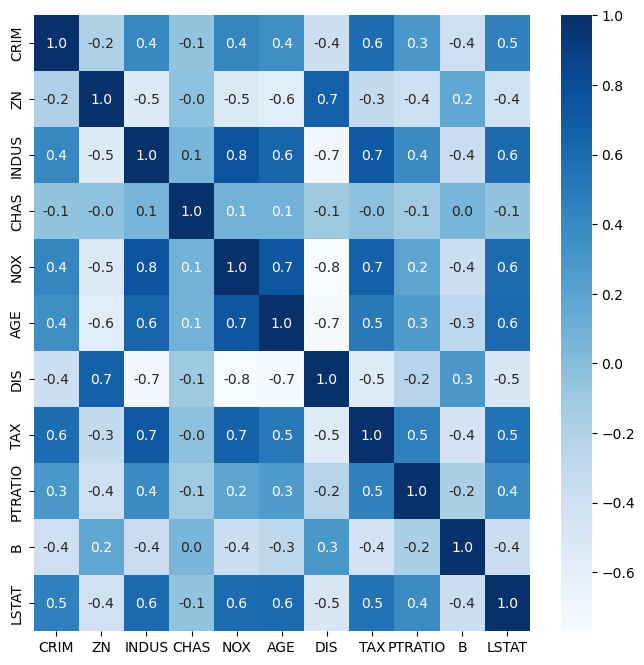

In [80]:
# vemos la matriz de correlación
correlation_matrix = df_housing[col_vif_sin_RM].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues');

In [81]:
# calculamos nuestra métrica VIF
calculo_vif(X_sin_RM, col_vif_sin_RM)

VIF variable
0   24.860800     CRIM
1    2.527765       ZN
2   11.795543    INDUS
3    1.140784     CHAS
4   19.944008      NOX
5    3.480801      AGE
6   10.707694      DIS
7   16.018289      TAX
8    1.663594  PTRATIO
9    1.488328        B
10  19.035459    LSTAT

Vemos que las variables CRIM, INDUS, NOX, DIS, TAX y LSTAT tienen un VIF mayor de 10, están altamente correlacionadas. Eliminamos la variable CRIM, es la que mejor correlación tiene con las demás.

In [82]:
col_vif_sin_RM= ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [83]:
calculo_vif(X_sin_RM, col_vif_sin_RM)

VIF variable
0   2.462329       ZN
1  11.789383    INDUS
2   1.136053     CHAS
3  16.361066      NOX
4   3.477900      AGE
5  10.536503      DIS
6  11.266134      TAX
7   1.662848  PTRATIO
8   1.435540        B
9  18.605553    LSTAT

Eliminando CRIM las variables INDUS, NOX, DIS, TAX y LSTAT continuan por con un VIF mayor a 10. Eliminamos TAX que es que menos correlación tiene con las demás.

In [84]:
col_vif_sin_RM= ['ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [85]:
calculo_vif(X_sin_RM, col_vif_sin_RM)

VIF variable
0   2.241267       ZN
1  10.443412    INDUS
2   1.131930     CHAS
3  13.933497      NOX
4   3.455381      AGE
5  10.530050      DIS
6   1.481015  PTRATIO
7   1.388588        B
8  18.492788    LSTAT

Las variables INDUS y DIS ya tienen un VIF muy cercano a 10. NOX y LSTAT son las que continúan con VIF muy por encima de 10, eliminamos NOX porque es la que mayor correlación tiene con las demás.

In [86]:
col_vif_sin_RM= ['ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [87]:
calculo_vif(X_sin_RM, col_vif_sin_RM)

VIF variable
0   2.234538       ZN
1   7.086088    INDUS
2   1.125340     CHAS
3   3.335578      AGE
4  10.447816      DIS
5   1.328777  PTRATIO
6   1.373841        B
7  14.800747    LSTAT

De las dos variables por encima de 10 eliminamos DIS, por el contexto entendemos que LSTAT es más relevante para nuestra variable objetivo.

In [88]:
col_vif_sin_RM= ['ZN', 'INDUS', 'CHAS', 'AGE', 'PTRATIO', 'B', 'LSTAT']

In [89]:
calculo_vif(X_sin_RM, col_vif_sin_RM)

VIF variable
0  2.008151       ZN
1  6.703453    INDUS
2  1.115300     CHAS
3  1.778270      AGE
4  1.317028  PTRATIO
5  1.335959        B
6  6.738715    LSTAT

Ahora tenemos un conjunto de variables independientes, vamos a entrenar con ellas a nuestros modelos.

### Modelo de Regresión Linear Simple sin la variable RM.
Mantenemos nuestra variable objetivo, nuestra variable independiente será LSTAT.

[6.85559016]
21.857687117900568


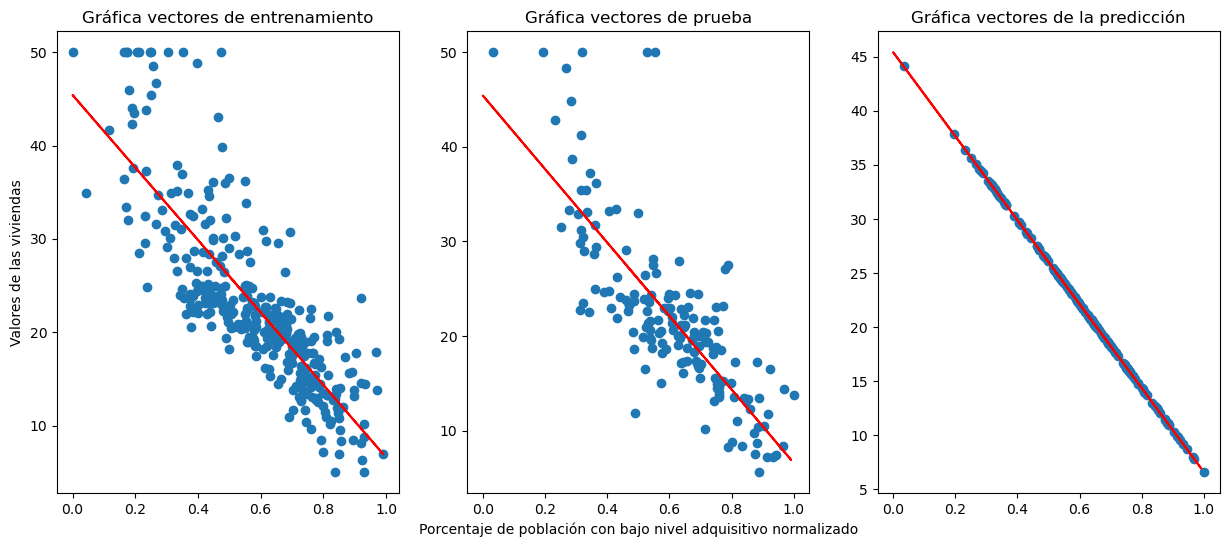

In [90]:
lm_sin_RM = linear_model.LinearRegression()
lm_sin_RM.fit(X_train_sin_RM[['LSTAT']],y_train_sin_RM)
print(lm.coef_)
print(lm.intercept_)
y_predRL_sin_RM = lm_sin_RM.predict(X_test_sin_RM[['LSTAT']])
plt.figure(figsize=(15,6))
# gráfica vectores de entrenamiento
plt.subplot(1,3,1)
plt.scatter(X_train_sin_RM[['LSTAT']],y_train_sin_RM)
plt.plot(X_train_sin_RM['LSTAT'], lm_sin_RM.predict(X_train_sin_RM[['LSTAT']]), c='red')
plt.title('Gráfica vectores de entrenamiento')
plt.ylabel('Valores de las viviendas');
# gráfica vectores de prueba
plt.subplot(1,3,2)
plt.scatter(X_test_sin_RM[['LSTAT']],y_test_sin_RM)
plt.plot(X_train_sin_RM['LSTAT'], lm_sin_RM.predict(X_train_sin_RM[['LSTAT']]), c='red')
plt.title('Gráfica vectores de prueba')
plt.xlabel('Porcentaje de población con bajo nivel adquisitivo normalizado');
# gráfica vectores de predicción
plt.subplot(1,3,3)
plt.scatter(X_test_sin_RM[['LSTAT']],y_predRL_sin_RM)
plt.plot(X_train_sin_RM['LSTAT'], lm_sin_RM.predict(X_train_sin_RM[['LSTAT']]), c='red')
plt.title('Gráfica vectores de la predicción');

### Evaluación del modelo.

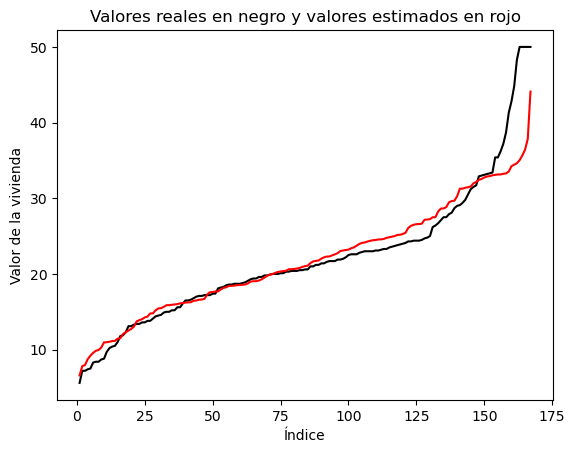

In [91]:
x = range(1,len(y_test_sin_RM)+1)
plt.plot(x, sorted(y_test_sin_RM), color ='black')
plt.plot(x, sorted(y_predRL_sin_RM), color ='red')
plt.title('Valores reales en negro y valores estimados en rojo')
plt.xlabel('Índice')
plt.ylabel('Valor de la vivienda');

El modelo tiene buena predicción por debajo de 20000 dólares, puede mejorar por encima de ese valor.

#### Error cuadrático.

In [92]:
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test_sin_RM, y_predRL_sin_RM))
R2_RLS_sin_RM = r2_score(y_test_sin_RM, y_predRL_sin_RM)

Variance score: 0.6339


#### Cálculo de errores absolutos.

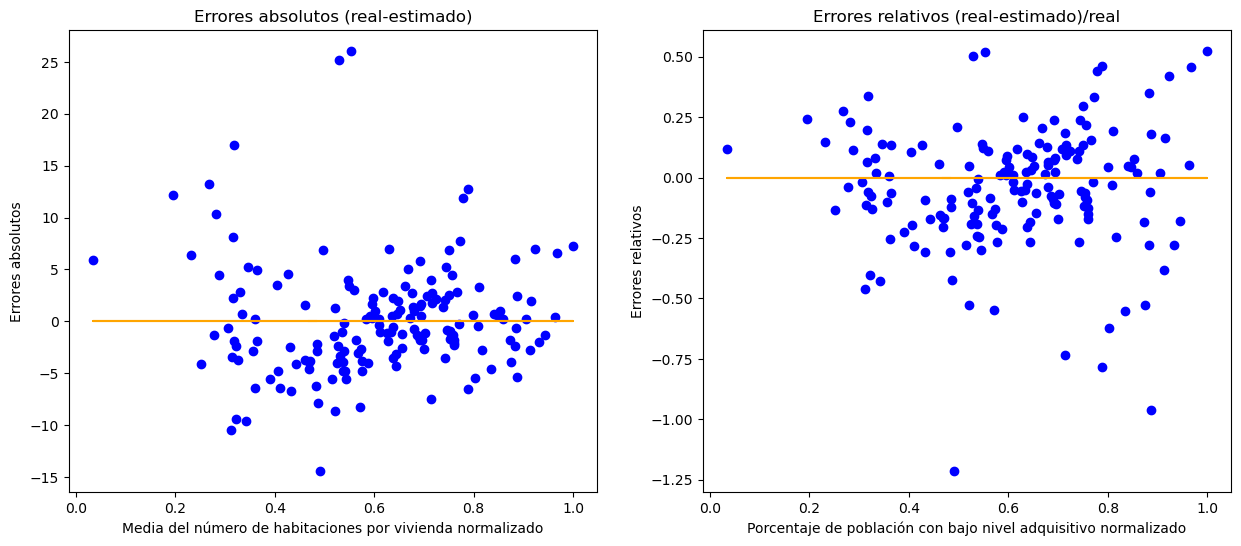

In [93]:
# errores absolutos
err_abs = y_test_sin_RM - y_predRL_sin_RM
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Errores absolutos (real-estimado)')
plt.xlabel('Media del número de habitaciones por vivienda normalizado')
plt.ylabel('Errores absolutos');
plt.scatter(X_test_sin_RM['LSTAT'], err_abs, color='blue')
plt.plot(X_test_sin_RM['LSTAT'], np.zeros(len(err_abs)), color='orange');
# errores relativos
err_rel = (y_test_sin_RM - y_predRL_sin_RM)/y_test_sin_RM
plt.subplot(1,2,2)
plt.title('Errores relativos (real-estimado)/real')
plt.xlabel('Porcentaje de población con bajo nivel adquisitivo normalizado')
plt.ylabel('Errores relativos');
plt.scatter(X_test_sin_RM['LSTAT'], err_rel, color='blue')
plt.plot(X_test_sin_RM['LSTAT'], np.zeros(len(err_rel)), color='orange');

Vemos que los valores residuales tienen homocedasticidad y no siguen patrones.

#### Error cuadrático y error cuadrático medio.

Mean squared error: 29.5172


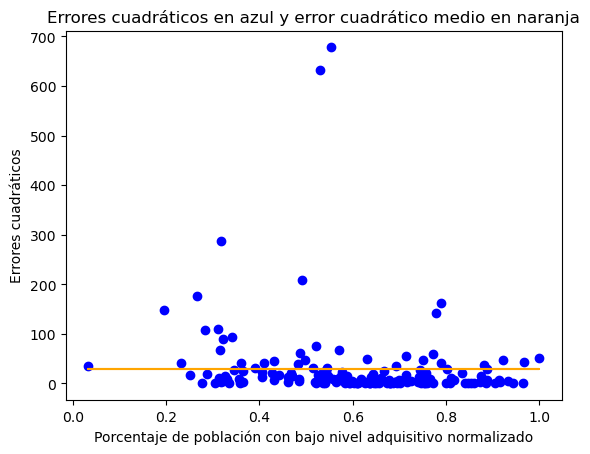

In [94]:
# Error cuadrático.
err_cuad_sin_RM = pow(err_abs,2)
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test_sin_RM, y_predRL_sin_RM))
MSE_RLS_sin_RM = mean_squared_error(y_test_sin_RM, y_predRL_sin_RM)
# los representamos gráficamente
Y_error_sin_RM = np.repeat(MSE_RLS_sin_RM, len(err_cuad))
plt.scatter(X_test_sin_RM['LSTAT'], err_cuad_sin_RM, color='blue')
plt.plot(X_test_sin_RM['LSTAT'], Y_error_sin_RM, color='orange')
plt.title('Errores cuadráticos en azul y error cuadrático medio en naranja')
plt.xlabel('Porcentaje de población con bajo nivel adquisitivo normalizado')
plt.ylabel('Errores cuadráticos');

#### Validamos el modelo.

In [95]:
# Validación cruzada repetida
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = lm_sin_RM,  # aquí podríamos pasar también un pipeline
                X         = X_train_sin_RM[['LSTAT']],
                y         = y_train_sin_RM,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_RLS_sin_RM = cv_scores.mean()

Métricas de validación cruzada: [0.69054066 0.7124641  0.62232007 0.68744588 0.45956775 0.71687417
 0.55714297 0.70456785 0.63129579 0.66500744 0.61317613 0.68810564
 0.71909062 0.64514905 0.64269992 0.68790485 0.7622483  0.56041158
 0.73314629 0.56318762 0.70714626 0.70458272 0.6291145  0.64822721
 0.67689616]
Media métricas de validación cruzada: 0.6571325408279958


### Modelo Regresión Linear Múltiple sin la variable RM.

In [96]:
regr_sin_RM = linear_model.LinearRegression()
regr_sin_RM.fit(X_train_sin_RM, y_train_sin_RM)
# coeficientes
print('Coefficients: \n', regr_sin_RM.coef_)
# Hacemos la predicción
y_predRLM_sin_RM = regr_sin_RM.predict(X_test_sin_RM)
# Precisión del modelo
print("Precisión del modelo:", regr_sin_RM.score(X_test_sin_RM, y_test_sin_RM))
# Error absoluto medio
print("Mean absolute error: %.4f" % mean_absolute_error(y_test_sin_RM, y_predRLM_sin_RM))
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test_sin_RM, y_predRLM_sin_RM))
MSE_RLM_sin_RM = mean_squared_error(y_test_sin_RM, y_predRLM_sin_RM)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test_sin_RM, y_predRLM_sin_RM))
R2_RLM_sin_RM = r2_score(y_test, y_predRLM_sin_RM)

Coefficients: 
 [ -1.31256119   0.08260478  -2.27586857   1.98821956  -7.00623319
   1.59366053 -13.16387093  -5.30544167  -3.19064699   0.09995116
 -35.10838183  -2.80643927  -0.80959341   0.42633567   0.1547647
  -0.42508971  -1.71398554   0.19016317   1.11544344   3.86840096]
Precisión del modelo: 0.7002672491855022
Mean absolute error: 3.5117
Mean squared error: 24.1651
Variance score: 0.7003


#### Validamos el modelo.

In [97]:
# Validación cruzada repetida
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = regr_sin_RM,
                X         = X_train_sin_RM,
                y         = y_train_sin_RM,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_RLM_sin_RM = cv_scores.mean()

Métricas de validación cruzada: [0.77053667 0.77385745 0.78013189 0.82026001 0.63179112 0.79756441
 0.7318701  0.79732058 0.71787626 0.74919715 0.75552489 0.77151044
 0.74999636 0.81403872 0.74446504 0.73375084 0.8103731  0.73647962
 0.79396715 0.71931778 0.81896786 0.78177324 0.79560198 0.76074266
 0.68917012]
Media métricas de validación cruzada: 0.7618434177451177


### Modelo Ridge sin la variable RM.

In [98]:
from sklearn.linear_model import Ridge
ridge_sin_RM = linear_model.Ridge()
ridge_sin_RM.fit(X_train_sin_RM, y_train_sin_RM)
# coeficientes
print('Coefficients: \n', ridge_sin_RM.coef_)
# Hacemos la predicción
y_predRG_sin_RM = ridge_sin_RM.predict(X_test_sin_RM)
# Precisión del modelo
print("Precisión del modelo:", ridge_sin_RM.score(X_test_sin_RM, y_test_sin_RM))
# Error absoluto medio
print("Mean absolute error: %.4f" % mean_absolute_error(y_test_sin_RM, y_predRG_sin_RM))
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test_sin_RM, y_predRG_sin_RM))
MSE_RRd_sin_RM = mean_squared_error(y_test_sin_RM, y_predRG_sin_RM)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test_sin_RM, y_predRG_sin_RM))
R2_RRd_sin_RM = r2_score(y_test_sin_RM, y_predRG_sin_RM)

Coefficients: 
 [-1.36585127e+00  1.06789345e-01 -2.58661195e+00  2.26263048e+00
 -4.97818135e+00  1.15612951e+00 -1.01119417e+01 -4.40803449e+00
 -3.37219751e+00  1.36314001e-01 -3.06397489e+01 -2.66906286e+00
 -3.38096145e-01  7.26784701e-01 -1.77698077e-02 -3.91888925e-01
 -1.97086452e+00  1.50594687e-01  1.28927987e+00  3.22102301e+00]
Precisión del modelo: 0.6841380160700317
Mean absolute error: 3.5733
Mean squared error: 25.4655
Variance score: 0.6841


#### Validamos el modelo.

In [99]:
# Validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = ridge_sin_RM,
                X         = X_train_sin_RM,
                y         = y_train_sin_RM,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_Ridge_sin_RM = cv_scores.mean()

Métricas de validación cruzada: [0.78798858 0.71883696 0.77675514 0.80479647 0.67987697 0.76511399
 0.74912039 0.80004773 0.73629929 0.71594463 0.77451977 0.74230676
 0.75282498 0.81872319 0.73019298 0.73999512 0.78105569 0.75130605
 0.811966   0.70205357 0.80598109 0.76222662 0.76324481 0.75967011
 0.71713112]
Média métricas de validación cruzada: 0.7579191188089378


#### Buscamos los mejores hiperparámetros.

In [100]:
model = ridge_sin_RM
param_grid_ridge_random = dict(alpha = uniform())
grid_ridge_random_sin_RM = RandomizedSearchCV(estimator=model,
                          param_distributions=param_grid_ridge_random,
                          n_iter=100,
                          random_state=0,
                          scoring   = 'neg_mean_squared_error',
                          verbose = 1)
                          
grid_ridge_random_sin_RM.fit(X_train_sin_RM, y_train_sin_RM)
print ("Mejores parámetros: {}".format (grid_ridge_random_sin_RM.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros: {'alpha': 0.11037514116430513}


#### Modelo Ridge sin la variable RM y con los mejores hiperparámetros.

In [101]:
ridge_sin_RM_hiper = linear_model.Ridge(alpha = 0.11037514116430513)
ridge_sin_RM_hiper.fit(X_train_sin_RM, y_train_sin_RM)
# coeficientes
print('Coefficients: \n', ridge_sin_RM_hiper.coef_)
# Hacemos la predicción
y_predRG_hiper_sin_RM = ridge_sin_RM_hiper.predict(X_test_sin_RM)
# Precisión del modelo
print("Precisión del modelo:", ridge_sin_RM_hiper.score(X_test_sin_RM, y_test_sin_RM))
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test_sin_RM, y_predRG_hiper_sin_RM))
MSE_RRd_hiper_sin_RM = mean_squared_error(y_test_sin_RM, y_predRG_hiper_sin_RM)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test_sin_RM, y_predRG_hiper_sin_RM))
R2_RRd_hiper_sin_RM = r2_score(y_test_sin_RM, y_predRG_hiper_sin_RM)

Coefficients: 
 [ -1.33754475   0.08491288  -2.3291734    2.0264035   -6.68909252
   1.54041101 -12.72832744  -5.17688547  -3.21381561   0.10454998
 -34.55382234  -2.79342993  -0.74098124   0.46985697   0.13441835
  -0.42412227  -1.75040352   0.1847437    1.13780736   3.78211059]
Precisión del modelo: 0.6989552261714618
Mean squared error: 24.2709
Variance score: 0.6990


#### Validamos en modelo.

In [102]:
# Validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = ridge_sin_RM_hiper,
                X         = X_train_sin_RM,
                y         = y_train_sin_RM,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_Ridge_sin_RM_CV = cv_scores.mean()

Métricas de validación cruzada: [0.7742314  0.76780477 0.78079045 0.81912095 0.63990798 0.79403592
 0.73547101 0.79873379 0.72201208 0.74650086 0.75938429 0.76881481
 0.75143397 0.81590424 0.74378302 0.73612771 0.80786213 0.74007721
 0.79810068 0.71785339 0.81809908 0.78079498 0.79315284 0.76166663
 0.69420152]
Média métricas de validación cruzada: 0.7626346288160483


### Modelo XGBoost Regressor sin la variable RM.

In [103]:
XGBR_sin_RM = XGBRegressor(objective ='reg:squarederror', seed = 0)
XGBR_sin_RM.fit(X_train_sin_RM, y_train_sin_RM)
# Hacemos la predicción
y_predXGBR_sin_RM = XGBR_sin_RM.predict(X_test_sin_RM)
# Error absoluto medio
print("Mean absolute error: %.4f" % mean_absolute_error(y_test_sin_RM, y_predXGBR_sin_RM))
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test_sin_RM, y_predXGBR_sin_RM))
MSE_XGBR_sin_RM = mean_squared_error(y_test_sin_RM, y_predXGBR_sin_RM)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test_sin_RM, y_predXGBR_sin_RM))
R2_XGBR_sin_RM = r2_score(y_test_sin_RM, y_predXGBR_sin_RM)

Mean absolute error: 3.0201
Mean squared error: 24.7144
Variance score: 0.6935


#### Validamos el modelo.

In [104]:
# Validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = XGBR_sin_RM,  # aquí podríamos pasar también un pipeline
                X         = X_train_sin_RM,
                y         = y_train_sin_RM,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_XGBR_sin_RM = cv_scores.mean()

Métricas de validación cruzada: [0.85682669 0.71971166 0.77927698 0.81237966 0.77255567 0.82435741
 0.81133864 0.81373155 0.77179721 0.80631014 0.69804785 0.86344426
 0.79637933 0.83567916 0.76950205 0.73277646 0.80816658 0.81574015
 0.8114896  0.80622774 0.90872203 0.81272826 0.83674533 0.79206731
 0.780398  ]
Media métricas de validación cruzada: 0.8014559889356546


#### Buscamos los mejores hiperparámetros.

In [105]:
model = XGBR_sin_RM
param_grid_XGBR_random = dict(alpha = uniform())
grid_XGBR_random_sin_RM = RandomizedSearchCV(estimator=model,
                          param_distributions=param_grid_XGBR_random,
                          n_iter=100,
                          random_state=0,
                          scoring   = 'neg_mean_squared_error',
                          verbose = 1)
                          
grid_XGBR_random_sin_RM.fit(X_NM_train, y_train)
print ("Mejores parámetros: {}".format (grid_XGBR_random_sin_RM.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros: {'alpha': 0.9292961975762141}


#### Modelo XGBoost Regressor sin la variable RM y con los mejores hiperparámetros.

In [106]:
XGBR_hiper_sin_RM = XGBRegressor(objective ='reg:squarederror', seed = 0, alpha = 0.9292961975762141)
XGBR_hiper_sin_RM.fit(X_train_sin_RM, y_train_sin_RM)
# Hacemos la predicción
y_predXGBR_hiper_sin_RM = XGBR_hiper_sin_RM.predict(X_test_sin_RM)
# Error cuadrático medio
print("Mean squared error: %.4f" % mean_squared_error(y_test_sin_RM, y_predXGBR_hiper_sin_RM))
MSE_XGBR_hiper_sin_RM = mean_squared_error(y_test_sin_RM, y_predXGBR_hiper_sin_RM)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.4f' % r2_score(y_test_sin_RM, y_predXGBR_hiper_sin_RM))
R2_XGBR_hiper_sin_RM = r2_score(y_test_sin_RM, y_predXGBR_hiper_sin_RM)

Mean squared error: 23.1961
Variance score: 0.7123


#### Validamos el modelo.

In [107]:
# Validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_scores = cross_val_score(
                estimator = XGBR_hiper_sin_RM,  # aquí podríamos pasar también un pipeline
                X         = X_train_sin_RM,
                y         = y_train_sin_RM,
                scoring   = 'r2',
                cv        = cv
             )
print(f"Métricas de validación cruzada: {cv_scores}")
print(f"Media métricas de validación cruzada: {cv_scores.mean()}")
cv_sc_mean_XGBR_sin_RM_CV = cv_scores.mean()

Métricas de validación cruzada: [0.83878216 0.69229009 0.76158049 0.81872289 0.72496214 0.830044
 0.80689005 0.83727464 0.76557884 0.77109915 0.76289609 0.85108541
 0.80715237 0.85337112 0.77111307 0.75915064 0.83144233 0.80059561
 0.82702912 0.78990862 0.893062   0.79888038 0.78365915 0.82496676
 0.79237868]
Media métricas de validación cruzada: 0.7997566321612084


#### Comparamos las predicciones de los modelos sin la variable RM.

In [108]:
df_errores_sin_RM = pd.DataFrame([[MSE_RLS_sin_RM,R2_RLS_sin_RM,cv_sc_mean_RLS_sin_RM],[MSE_RLM_sin_RM,R2_RLM_sin_RM,cv_sc_mean_RLM_sin_RM],[MSE_RRd_sin_RM,R2_RRd_sin_RM,cv_sc_mean_Ridge_sin_RM,MSE_RRd_hiper_sin_RM,R2_RRd_hiper_sin_RM,cv_sc_mean_Ridge_sin_RM_CV],[MSE_XGBR_sin_RM,R2_XGBR_sin_RM,cv_sc_mean_XGBR_sin_RM,MSE_XGBR_hiper_sin_RM,R2_XGBR_hiper_sin_RM,cv_sc_mean_XGBR_sin_RM_CV]], columns = ['MSE','R2', 'R2_CV_5','MSE_Hiper','R2_Hiper','R2_Hiper_CV'], index = ['Regresión Linear Simple','Regresión Linear Múltiple', 'Ridge', 'XGBoost'])
df_errores_sin_RM

MSE        R2   R2_CV_5  MSE_Hiper  R2_Hiper  \
Regresión Linear Simple    29.517200  0.633882  0.657133        NaN       NaN   
Regresión Linear Múltiple  24.165095  0.700267  0.761843        NaN       NaN   
Ridge                      25.465469  0.684138  0.757919  24.270873  0.698955   
XGBoost                    24.714448  0.693453  0.801456  23.196080  0.712286   

                           R2_Hiper_CV  
Regresión Linear Simple            NaN  
Regresión Linear Múltiple          NaN  
Ridge                         0.762635  
XGBoost                       0.799757

El modelo más preciso es Regresión Linear Múltiple, si hacemos un Cross Validation sería XGBoost, que no mejora con los hiperparámetros como pasó incluyendo la variable RM.

### Resultados de ambos estudios.

#### Resultados con todas las variables: el mejor modelo es XGBoost Regression con un R2 de 0.833416 después de hacer validación cruzada.

#### Resultados sin tener en cuenta la variable RM: el mejor modelo es XGBoost Regression con un R2 de 0.801456 después de hacer validación cruzada.

### Conclusiones:   
#### Añadir variables mejora la predicción pero no tanto como podría parecer siendo una variable tan relevante. Los compradores no valoran tanto el número de habitaciones frente a otras características.